In [1]:
import random
import matplotlib.pyplot as plt
import torch
import numpy as np

from condensation.sort_entropy import sort_by_predictive_entropy, sort_by_entropy,sort_by_max_softmax
from utils.initiate import initiate_dataset, initiate_model

def visualize_entropy_groups_for_labels(trainset, model1, score_func, num_samples=10, rate=1.5):
    """
    Visualize random images from low, middle, or high entropy groups for each label.
    
    Parameters:
      trainset (iterable): The full training dataset.
                           Each element can be an image tensor or a (image, label) tuple.
      model1 (nn.Module): Pretrained model used for scoring.
      score_func (callable): Function that takes (model, trainset) and returns a score for each image.
      num_samples (int): Number of images to sample per group.
      rate (float): If <= 1.0, the full trainset is used without scoring.
                    If > 1.0, scoring and selection is applied.
    """
    
    # If rate > 1.0, score the filtered dataset
    scores = score_func(model1, trainset)
    
    # Helper to extract a numeric score from the score value.
    def extract_score(s):
        if isinstance(s, tuple) and len(s) > 1:
            return f"{s[0]}"
        return str(s)


    # Sort indices based on the extracted score (lowest to highest).
    sorted_indices = sorted(range(len(scores)), key=lambda i: extract_score(scores[i]))
    
    
    # Get all unique labels in the dataset
    unique_labels = set(lbl for _, lbl in trainset)
    
    for label in unique_labels:
        print(f"Processing label {label}...")

        label_indices = [i for i, (_, lbl) in enumerate(trainset) if lbl == label]
        n = len(label_indices)
        # Now, sort these indices by the score (using the sorted_indices list).
        filtered_indices = [idx for idx in sorted_indices if idx in label_indices]


        # Divide sorted indices into three groups: low, middle, high entropy.
        low_group = filtered_indices[: n // 3]
        middle_group = filtered_indices[n // 3: 2 * n // 3]
        high_group = filtered_indices[2 * n // 3:]
        
        # Randomly sample indices from each group.
        low_samples = random.sample(low_group, min(num_samples, len(low_group)))
        middle_samples = random.sample(middle_group, min(num_samples, len(middle_group)))
        high_samples = random.sample(high_group, min(num_samples, len(high_group)))
        
        # Create a figure with 3 rows (one per group) and num_samples columns.
        fig, axes = plt.subplots(3, num_samples, figsize=(num_samples * 2, 6))
        fig.suptitle(f"Label {label}: Random Samples from Low, Middle, and High Entropy Groups", fontsize=16)
        
        def get_image(sample):
            """
            Extract the image from a dataset sample and convert it to a format acceptable by imshow.
            If the sample is a tuple/list, the image is assumed to be the first element.
            Converts torch.Tensors to numpy arrays and handles shape conversion:
              - (1, H, W) -> (H, W) for grayscale images.
              - (3, H, W) -> (H, W, 3) for RGB images.
            """
            # Extract image from sample if it's a tuple/list.
            image = sample[0] if isinstance(sample, (list, tuple)) else sample
            
            # If it's a PyTorch tensor, convert it to a NumPy array.
            if isinstance(image, torch.Tensor):
                image = image.detach().cpu().numpy()
            
            # Handle shape: if shape is (1, H, W), squeeze out the channel dimension.
            if isinstance(image, np.ndarray) and image.ndim == 3:
                if image.shape[0] == 1:  # Likely grayscale image
                    image = np.squeeze(image, axis=0)
                elif image.shape[0] == 3:  # Likely RGB, so transpose to HxWxC
                    image = np.transpose(image, (1, 2, 0))
            return image

        # Plot low entropy images (first row).
        for j, idx in enumerate(low_samples):
            image = get_image(trainset[idx])
            cmap = 'gray' if image.ndim == 2 else None
            score_val = extract_score(scores[idx])
            axes[0, j].imshow(image, cmap=cmap)
            axes[0, j].axis("off")
            axes[0, j].set_title(score_val, fontsize=8)
        
        # Plot middle entropy images (second row).
        for j, idx in enumerate(middle_samples):
            image = get_image(trainset[idx])
            cmap = 'gray' if image.ndim == 2 else None
            score_val = extract_score(scores[idx])
            axes[1, j].imshow(image, cmap=cmap)
            axes[1, j].axis("off")
            axes[1, j].set_title(score_val, fontsize=8)
        
        # Plot high entropy images (third row).
        for j, idx in enumerate(high_samples):
            image = get_image(trainset[idx])
            cmap = 'gray' if image.ndim == 2 else None
            score_val = extract_score(scores[idx])
            axes[2, j].imshow(image, cmap=cmap)
            axes[2, j].axis("off")
            axes[2, j].set_title(score_val, fontsize=8)
        
        plt.tight_layout()
        plt.show()


Modified conv1: updated in_channels to 1.
Modified fc layer: updated out_features to 10.
Loaded weights from file: models/resnet18_MNIST
Processing label 0...


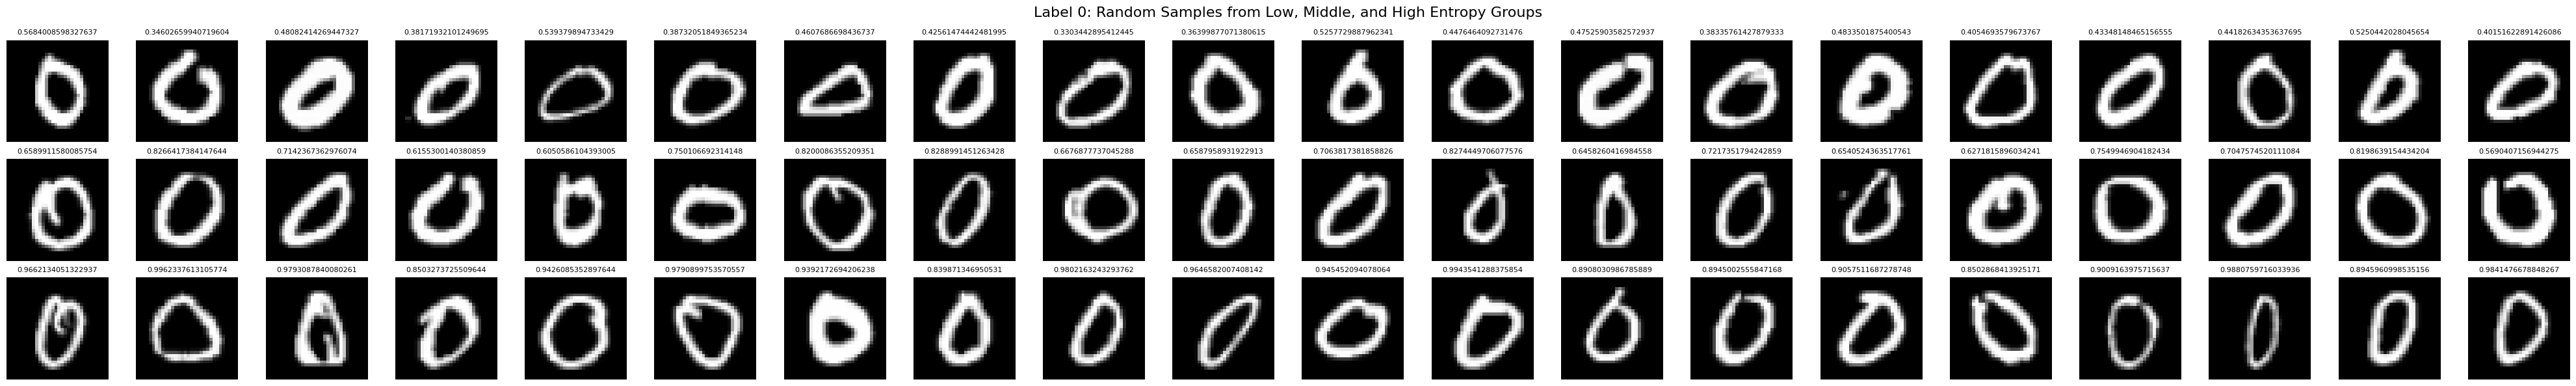

Processing label 1...


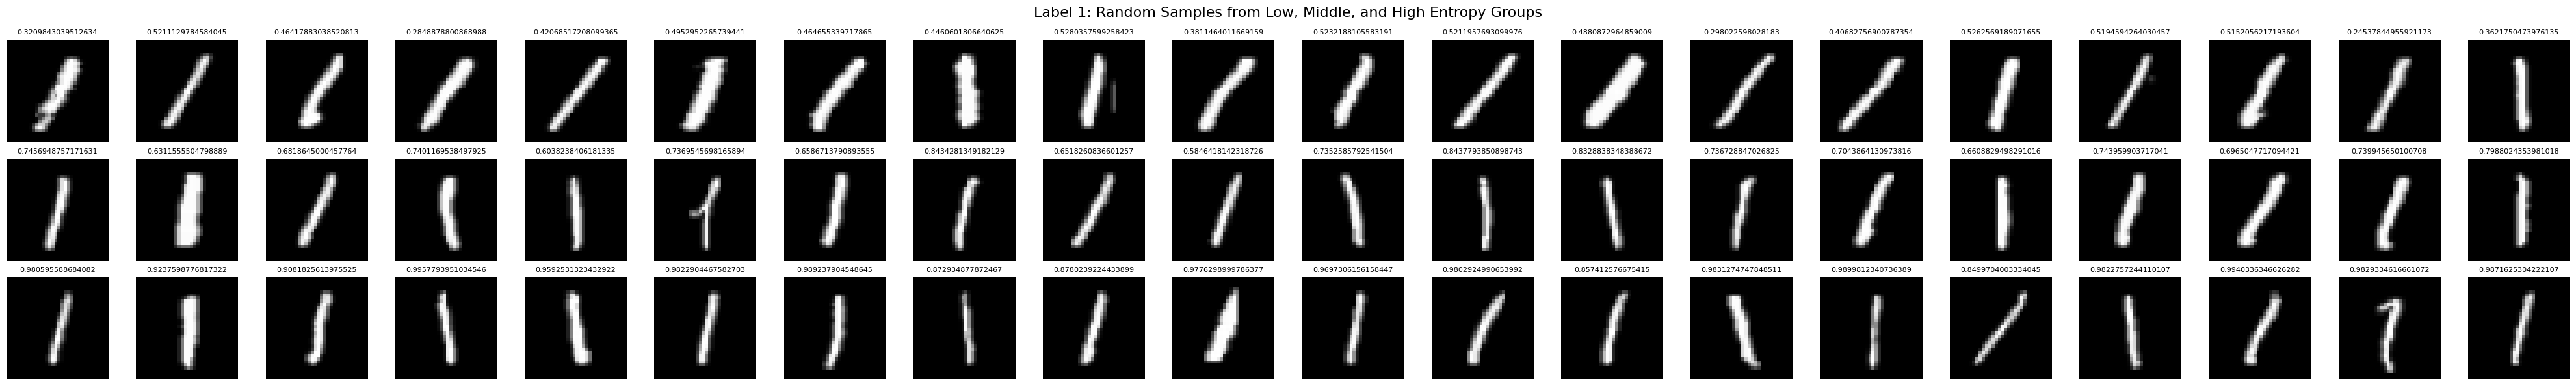

Processing label 2...


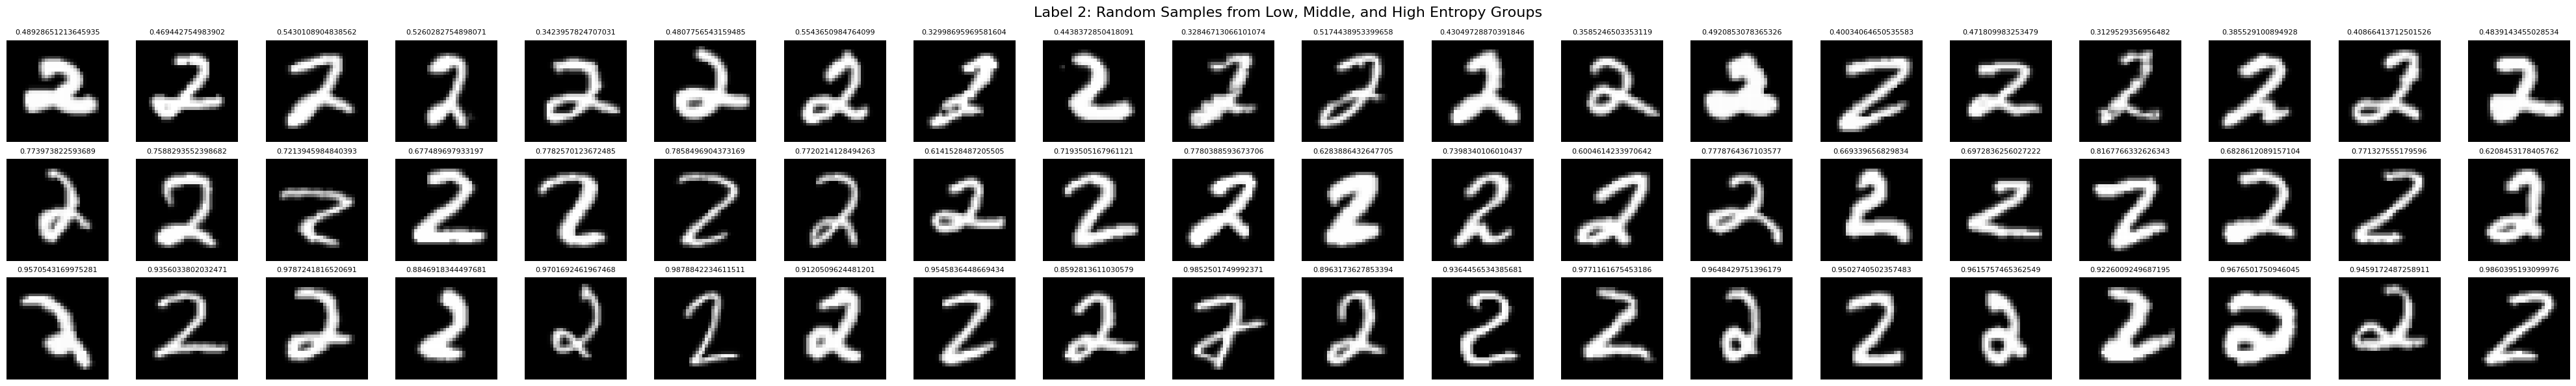

Processing label 3...


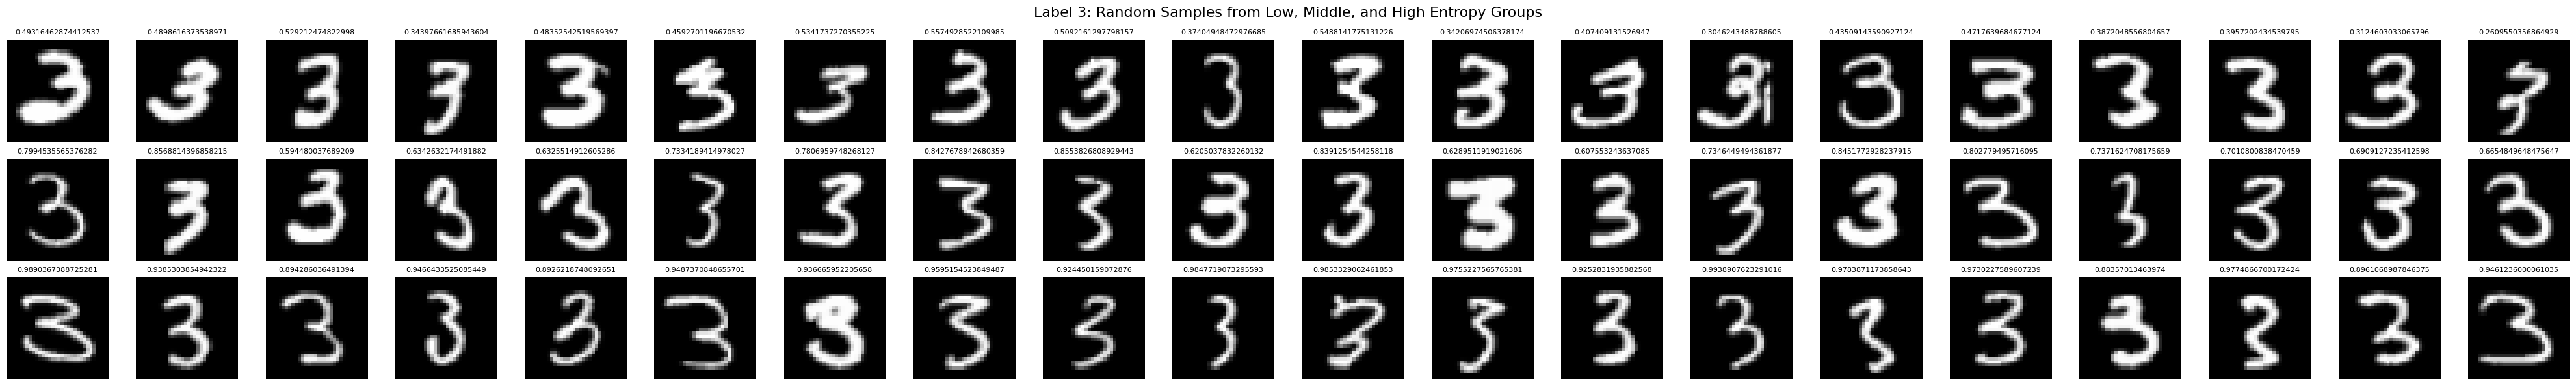

Processing label 4...


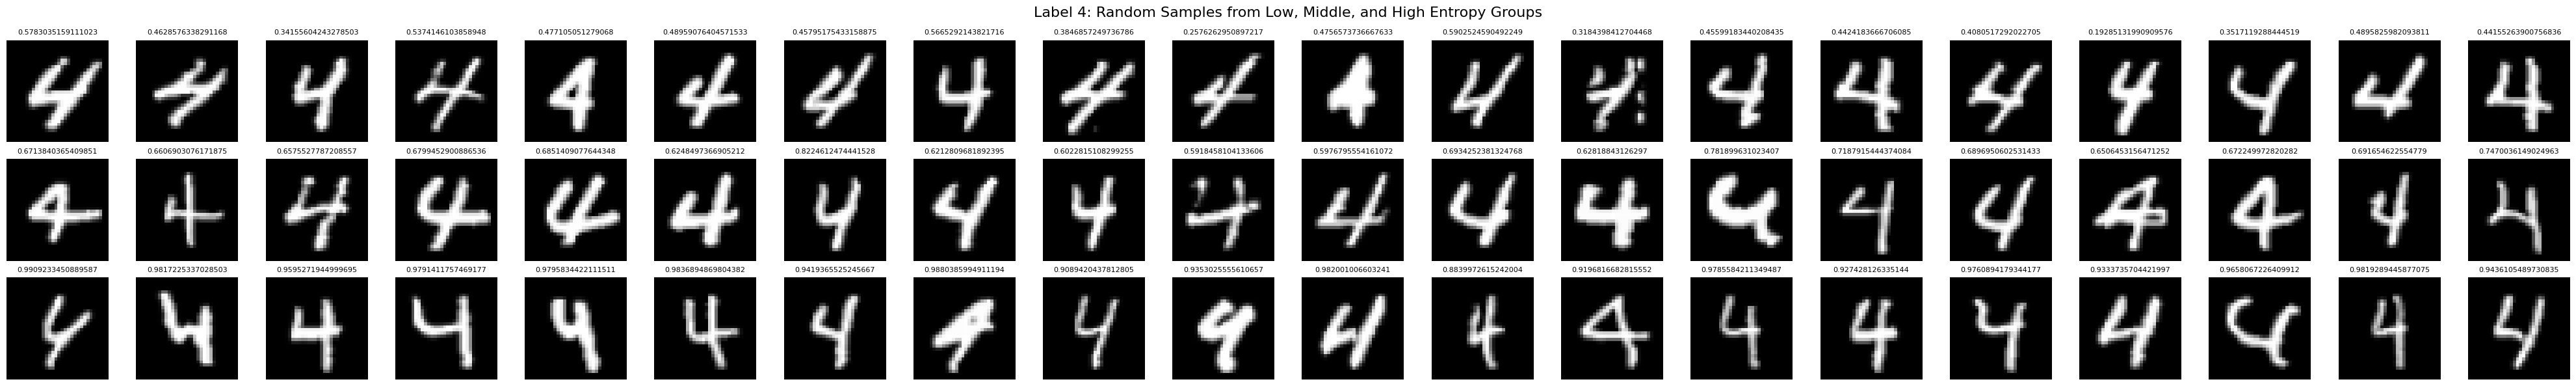

Processing label 5...


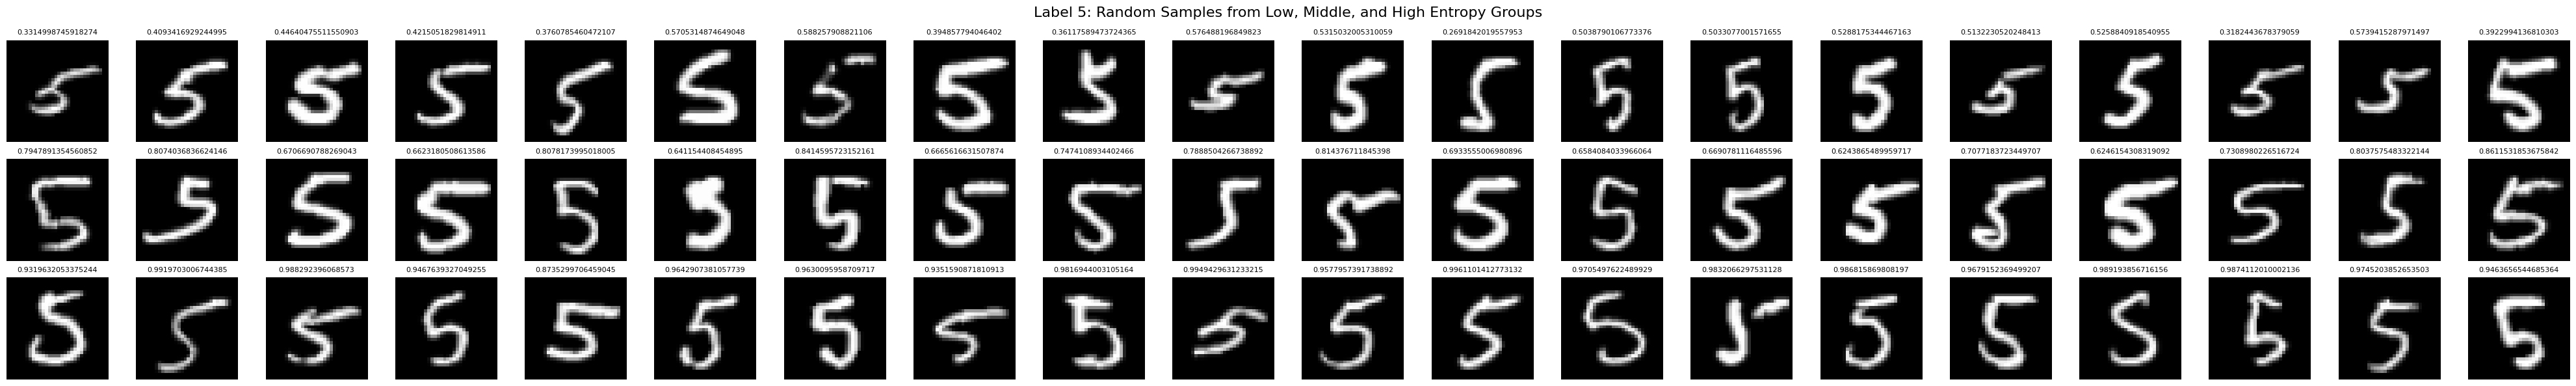

Processing label 6...


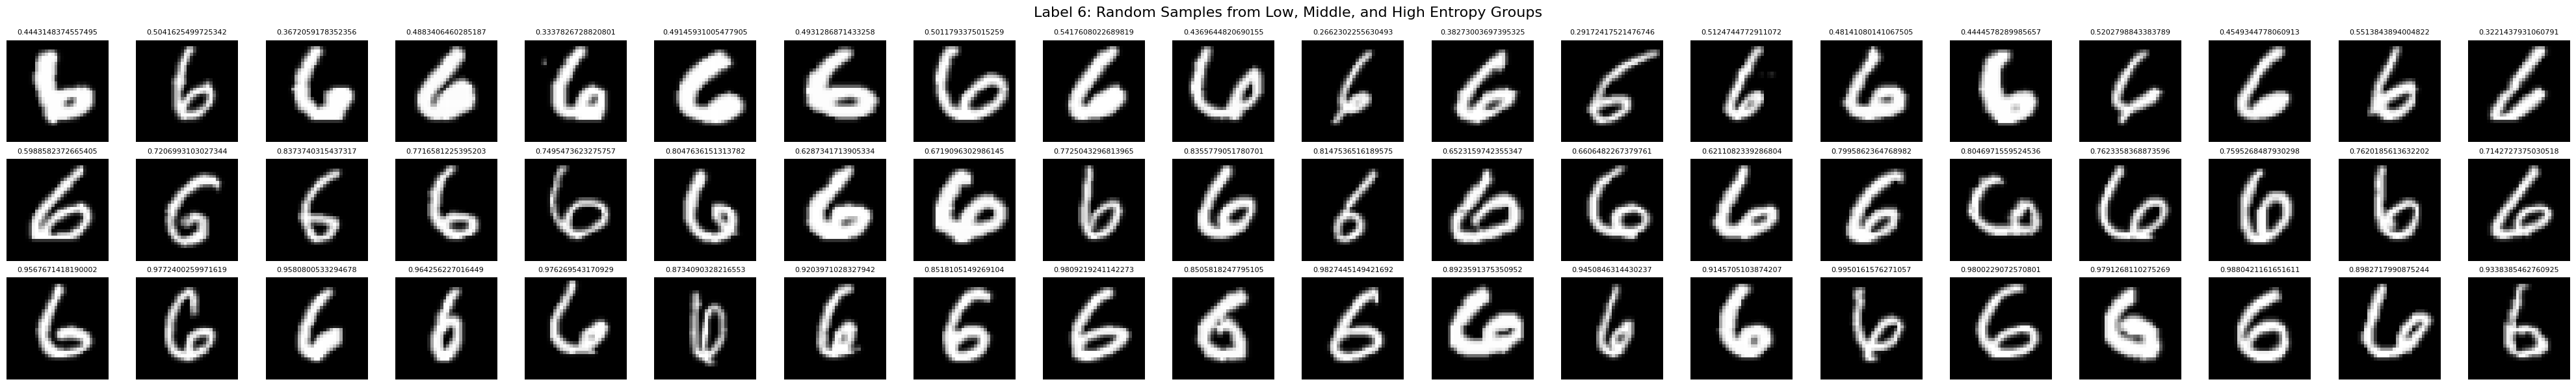

Processing label 7...


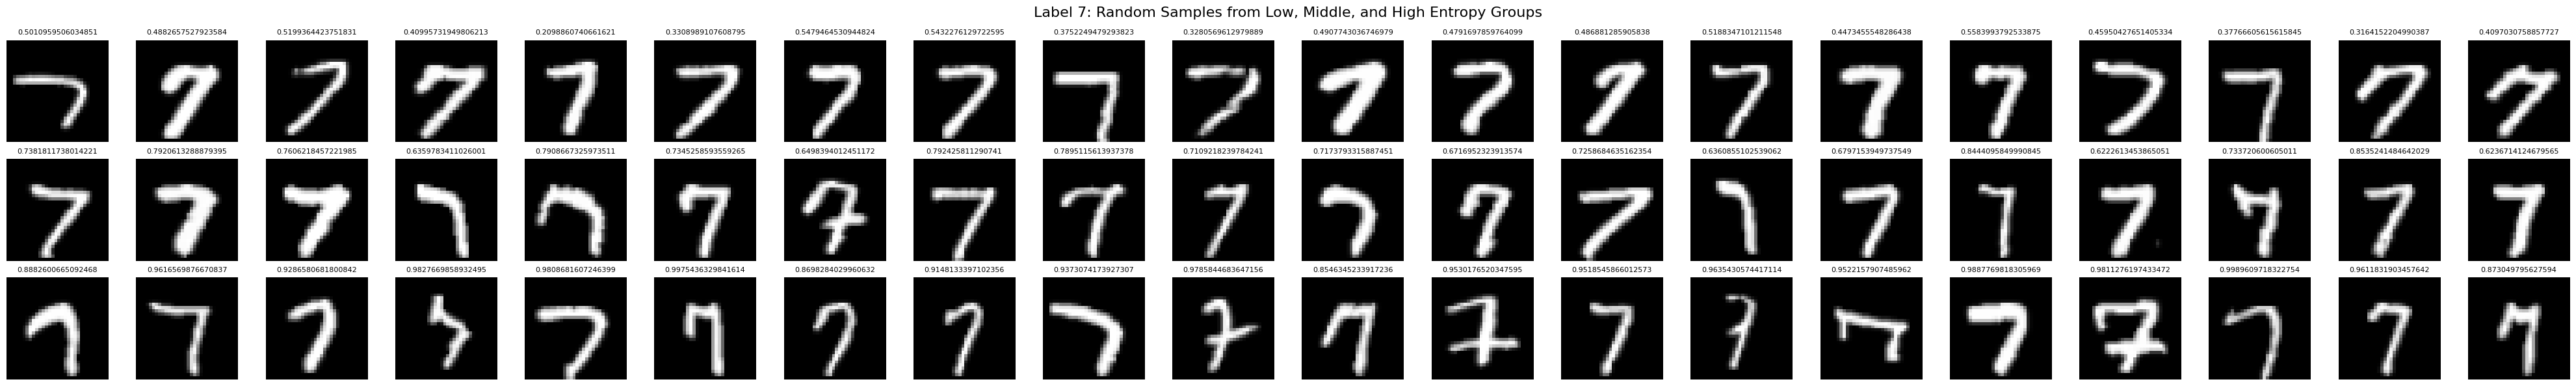

Processing label 8...


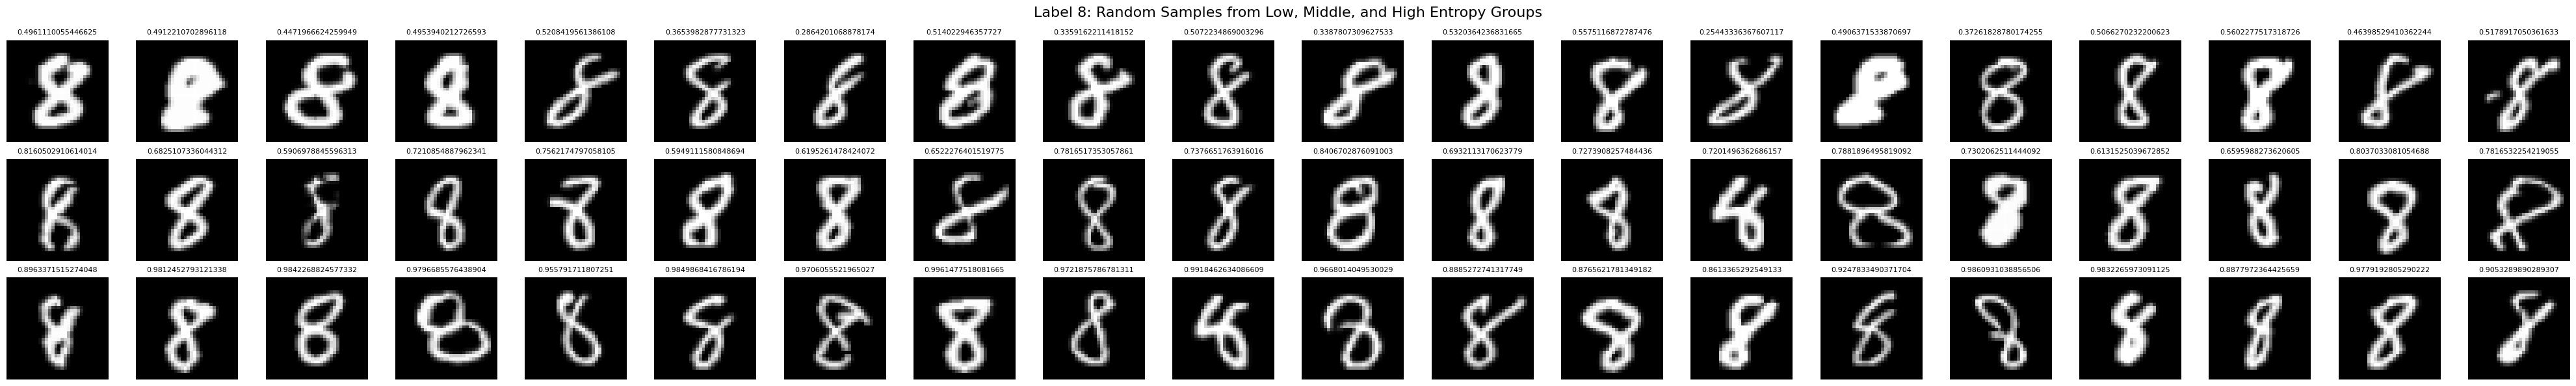

Processing label 9...


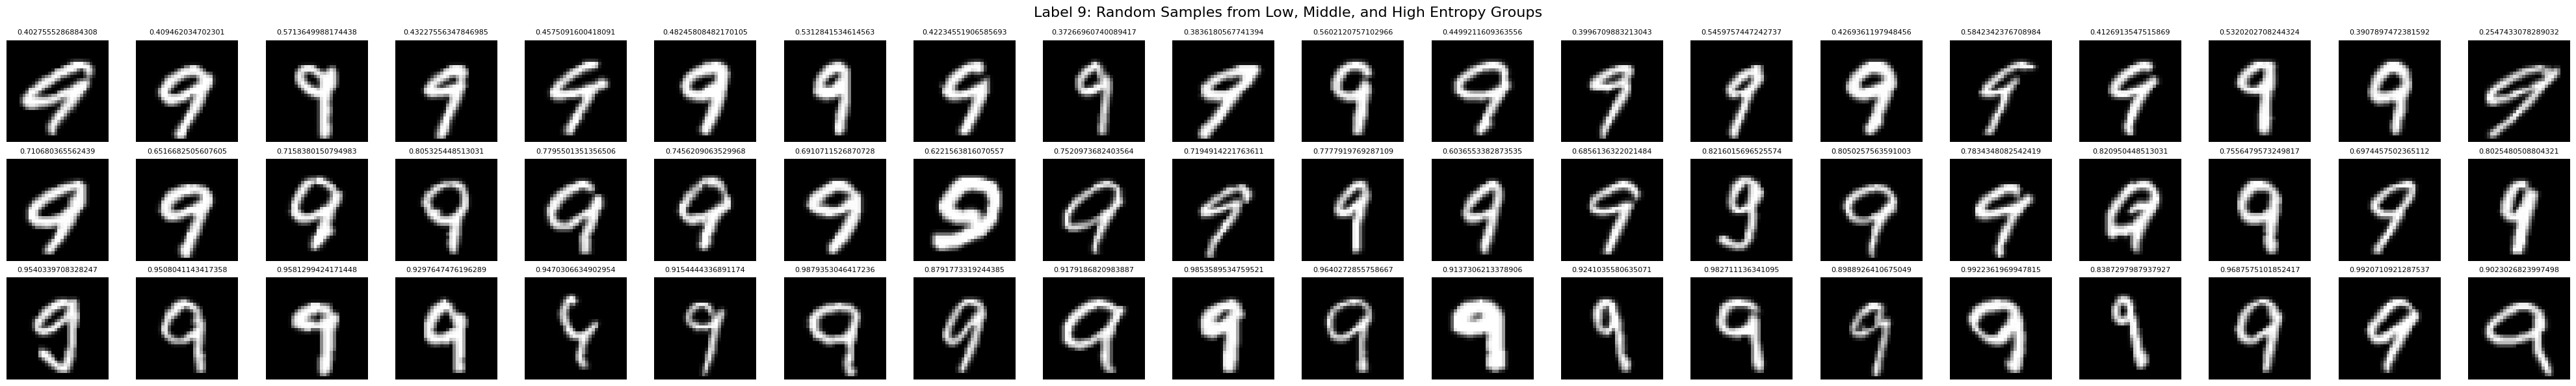

In [2]:
from condensation.sort_entropy import sort_by_max_softmax


model1 = initiate_model("resnet18", "MNIST", "models/resnet18_MNIST")
trainset, testset = initiate_dataset("MNIST", "resnet18")
visualize_entropy_groups_for_labels(testset, model1, sort_by_max_softmax, num_samples=20, rate=1.5)

Modified conv1: updated in_channels to 1.
Modified fc layer: updated out_features to 10.
Loaded weights from file: models/resnet18_MNIST_Evidence
Processing label 0...


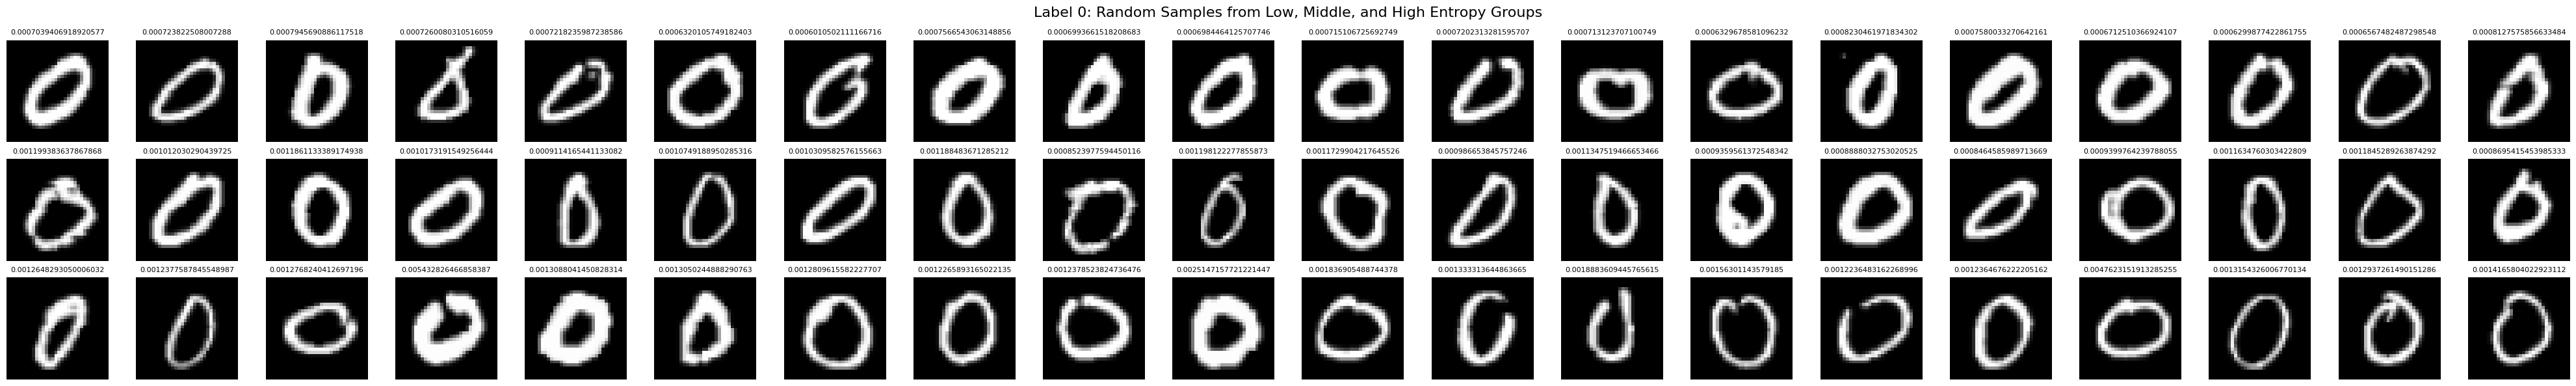

Processing label 1...


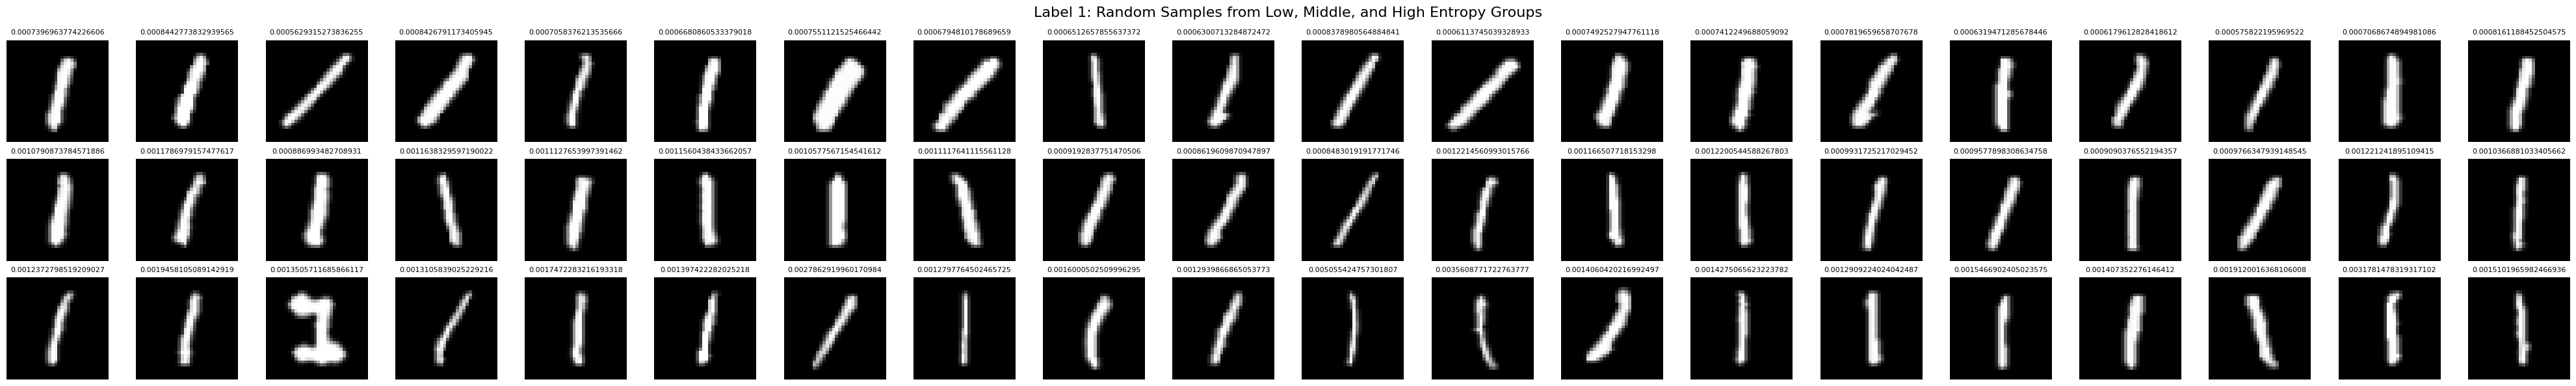

Processing label 2...


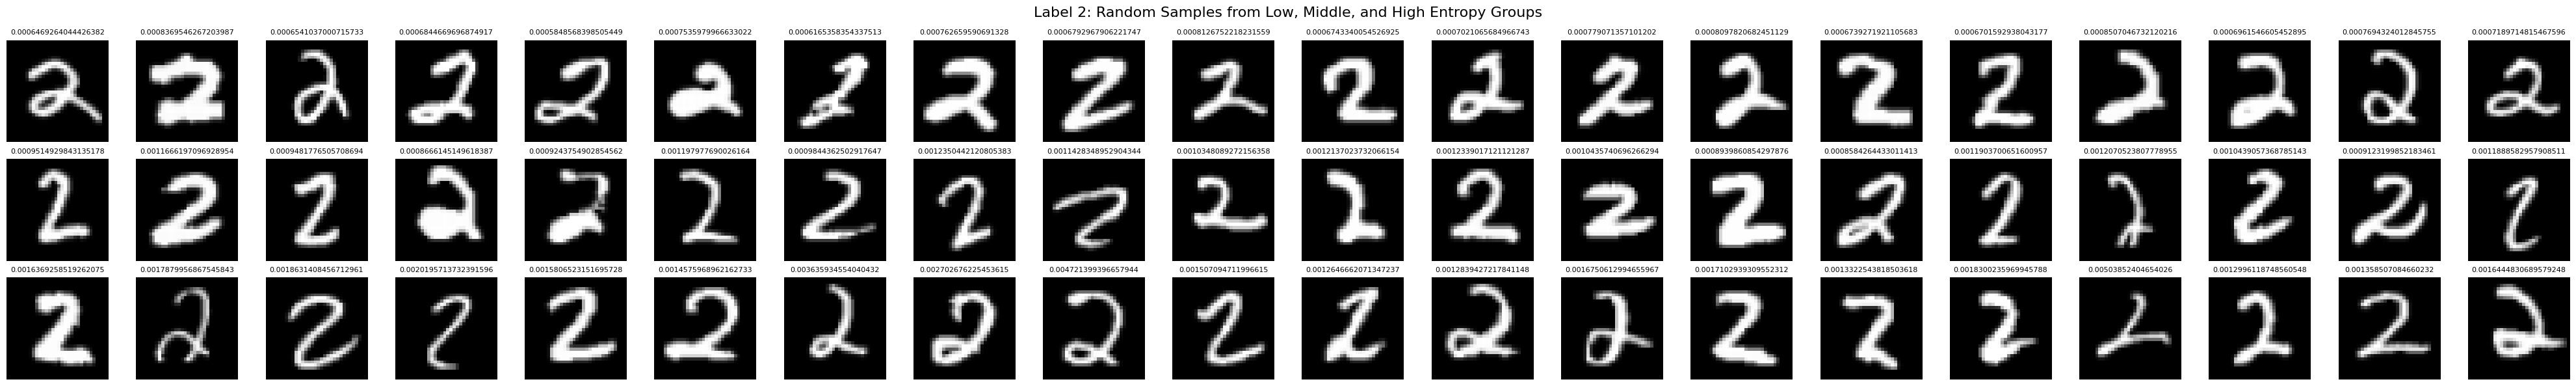

Processing label 3...


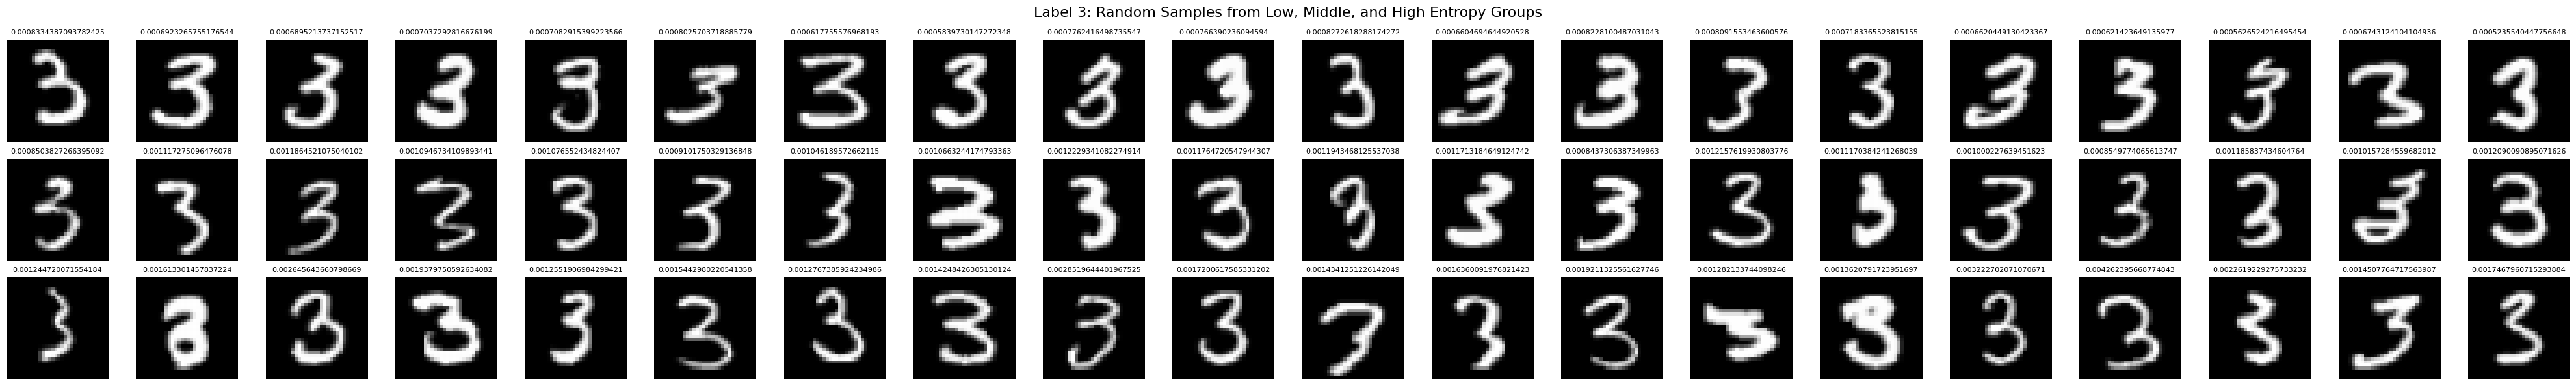

Processing label 4...


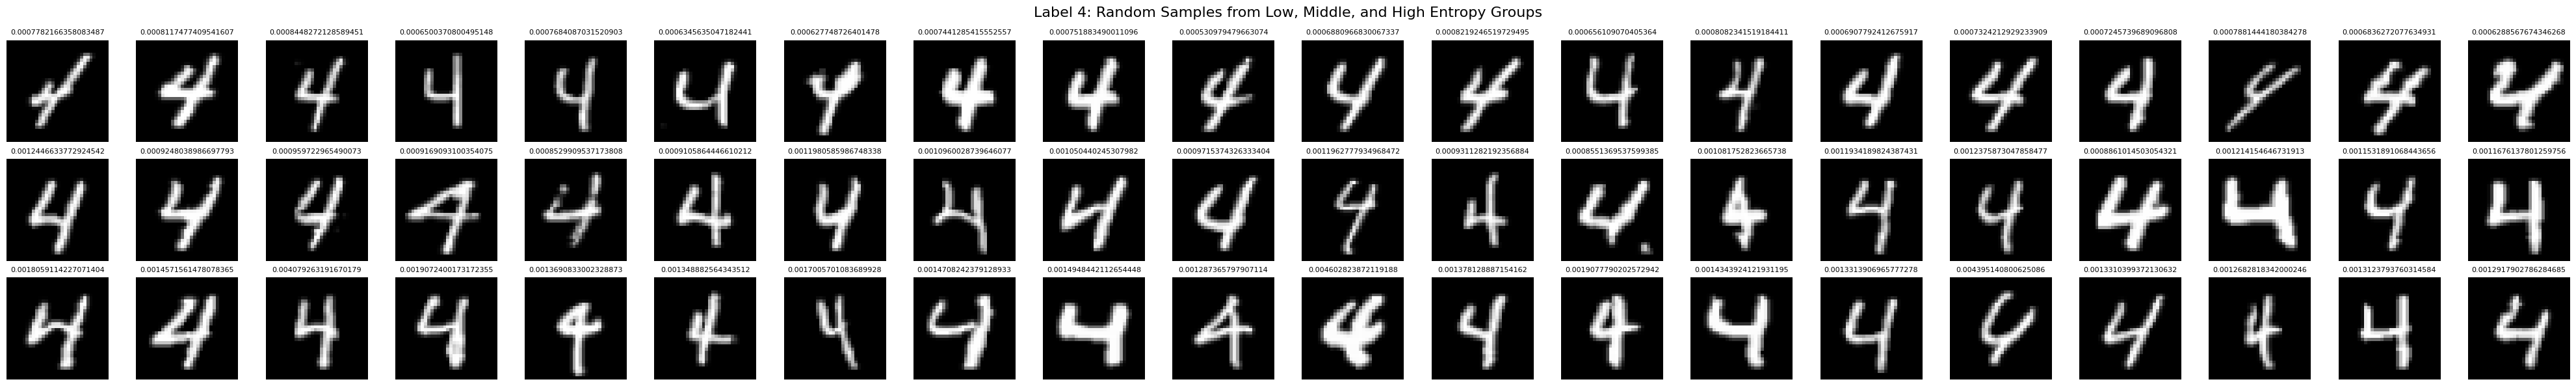

Processing label 5...


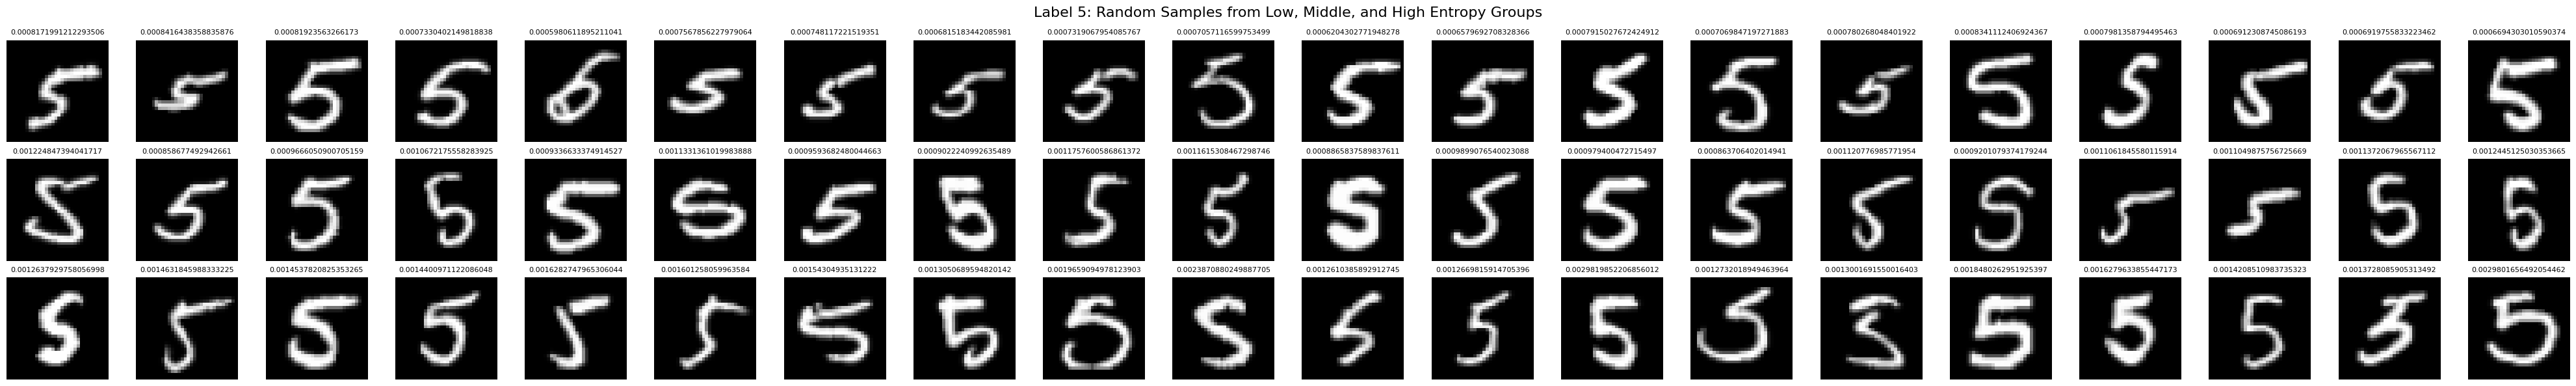

Processing label 6...


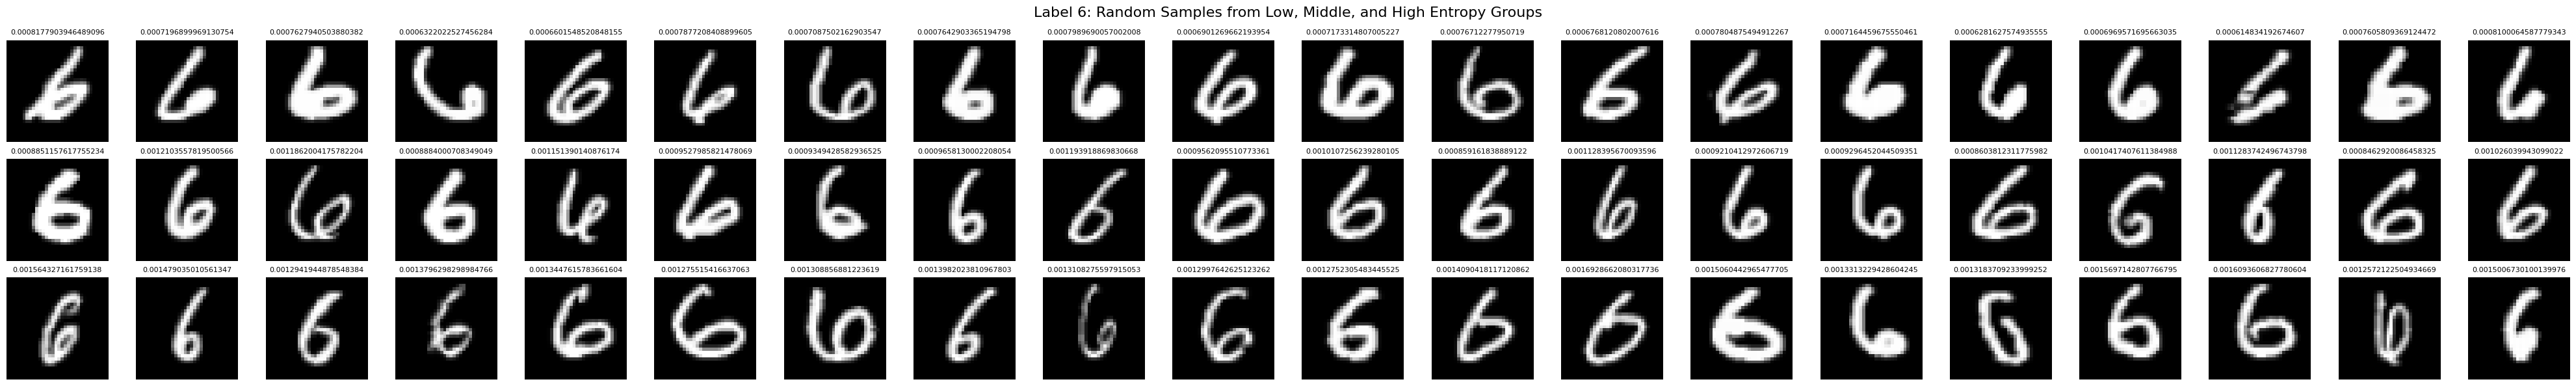

Processing label 7...


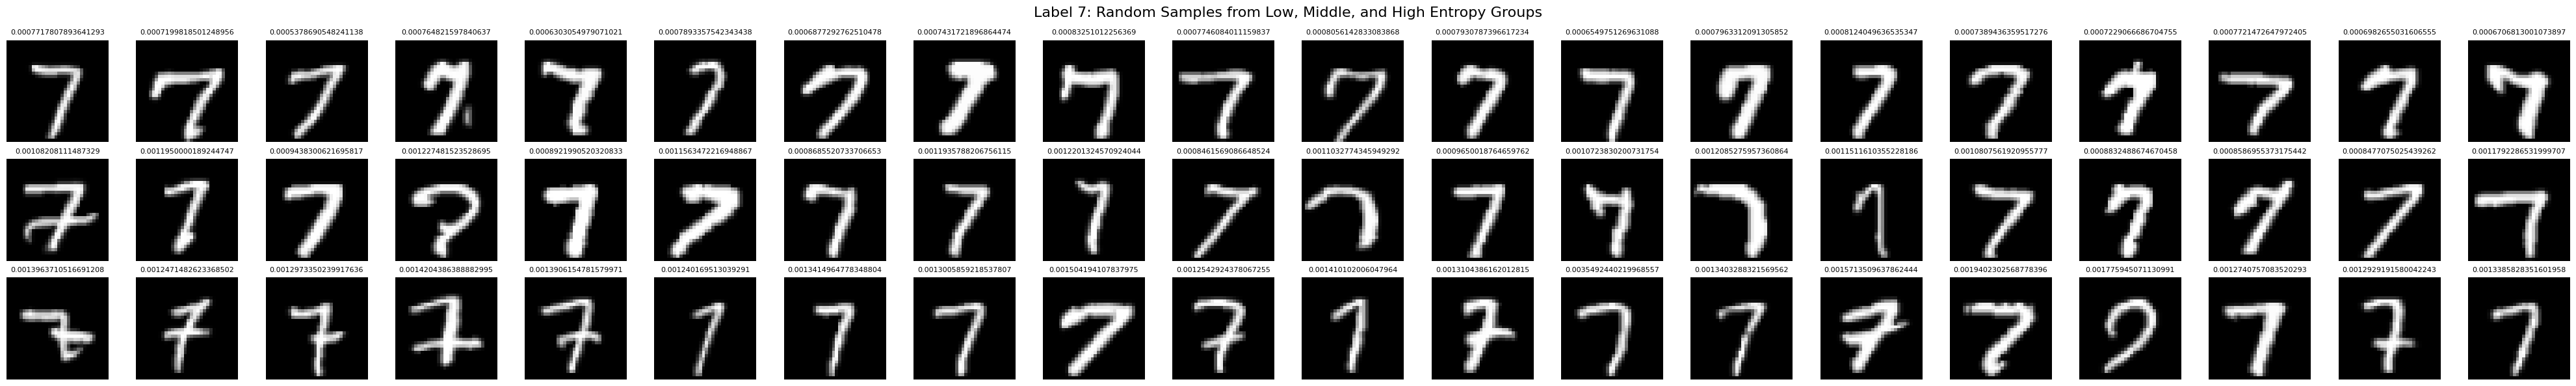

Processing label 8...


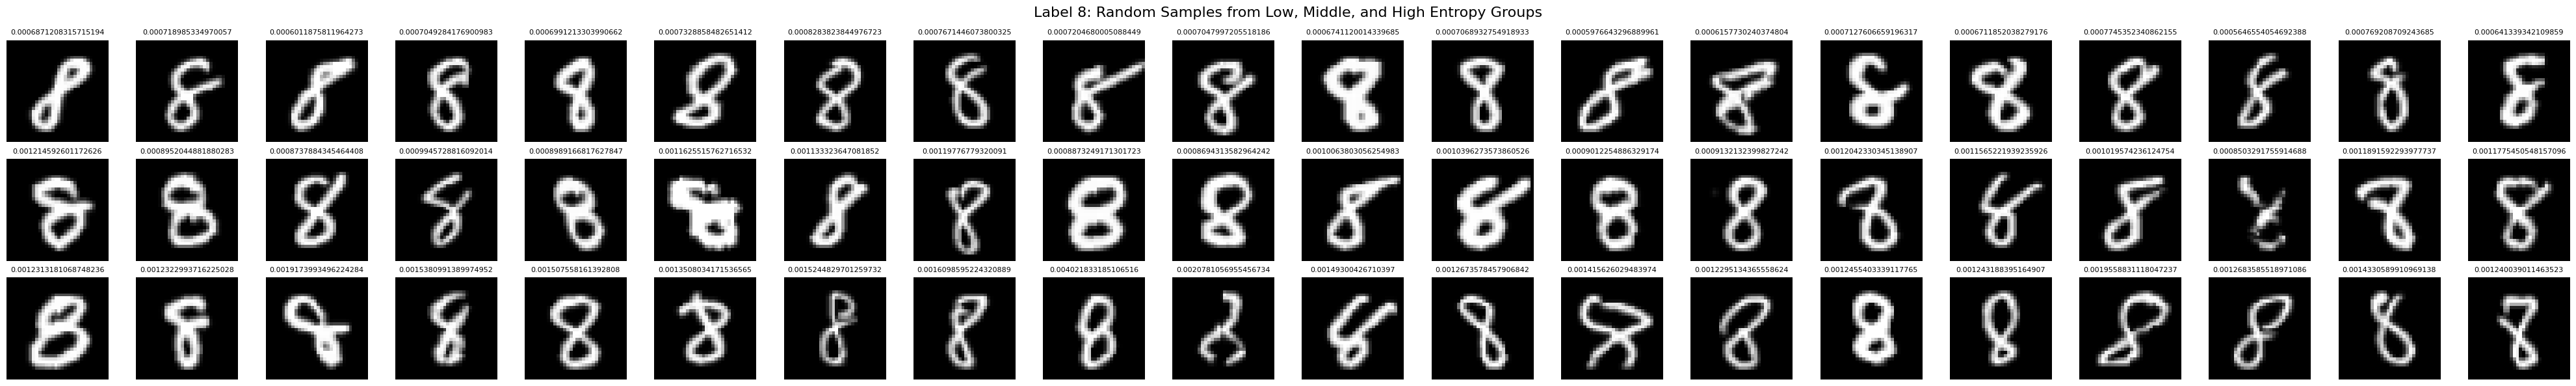

Processing label 9...


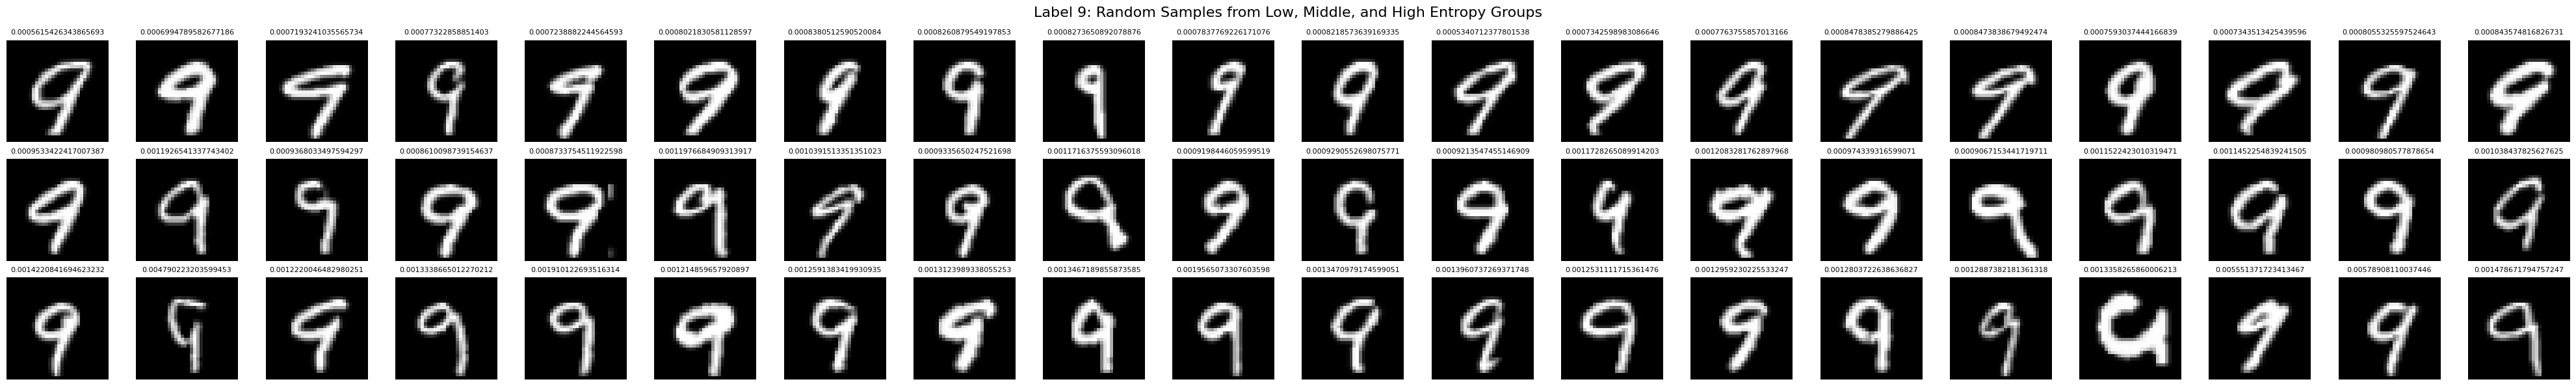

In [3]:
from condensation.sort_evidence import sort_by_total_evidence,sort_by_label_evidence, sort_by_label_uncertainty,sort_by_total_uncertainty


model1 = initiate_model("resnet18", "MNIST", "models/resnet18_MNIST_Evidence")
trainset, testset = initiate_dataset("MNIST", "resnet18")
visualize_entropy_groups_for_labels(testset, model1, sort_by_label_uncertainty, num_samples=20, rate=1.5)
#print( get_evidence_scores(model1,testset))

Modified conv1: updated in_channels to 1.
Modified fc layer: updated out_features to 10.
Loaded weights from file: models/resnet18_MNIST_Evidence
Processing label 0...


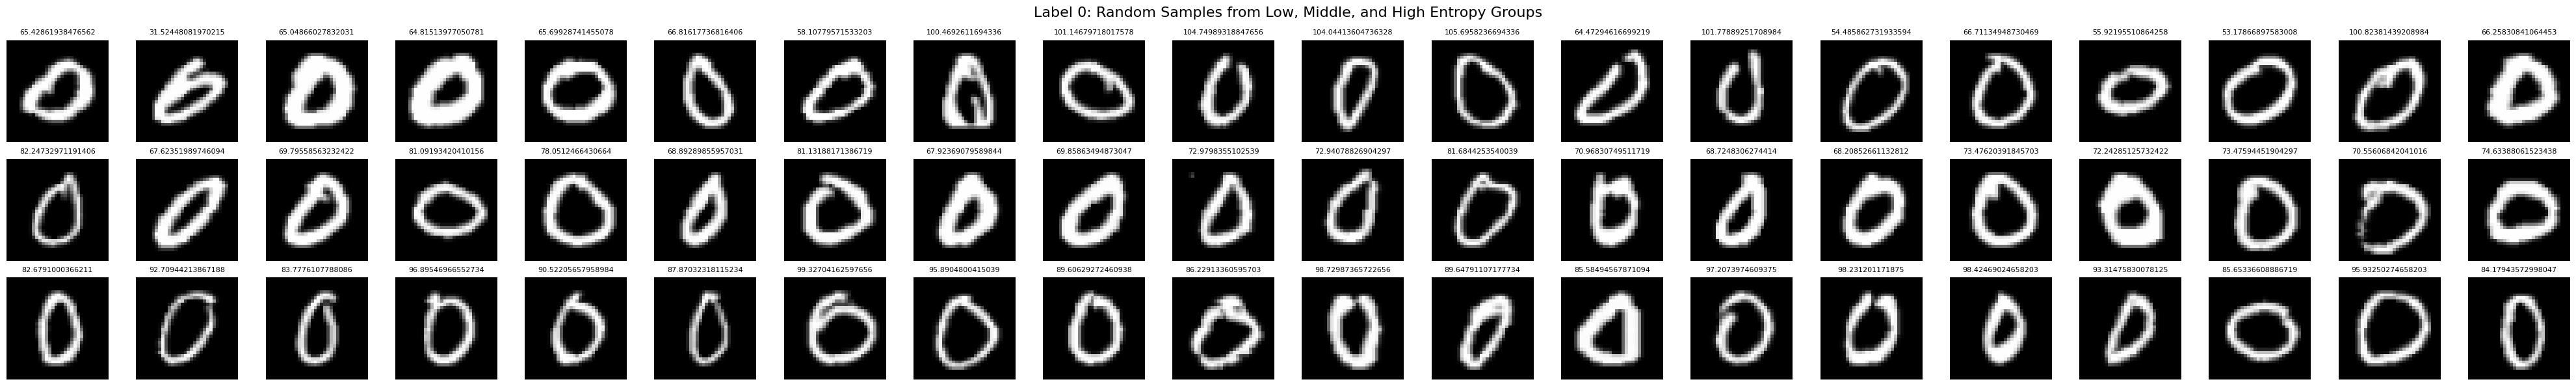

Processing label 1...


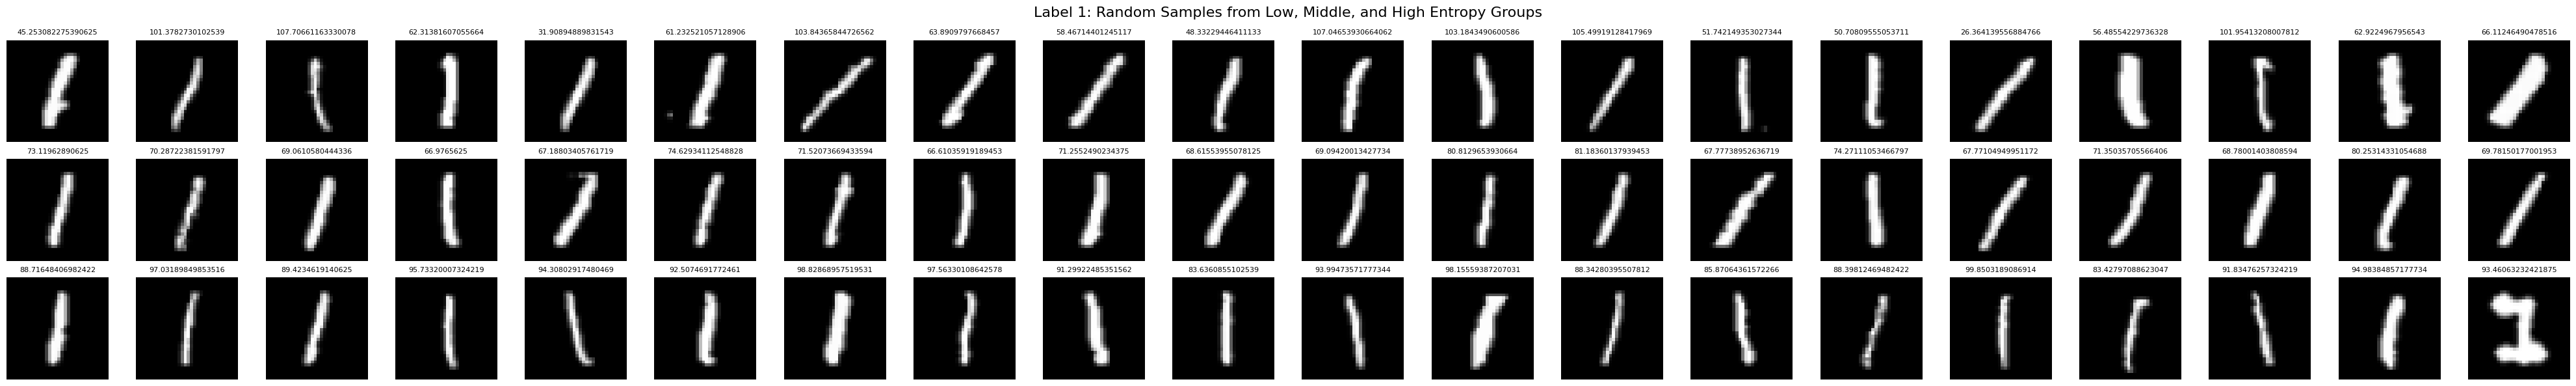

Processing label 2...


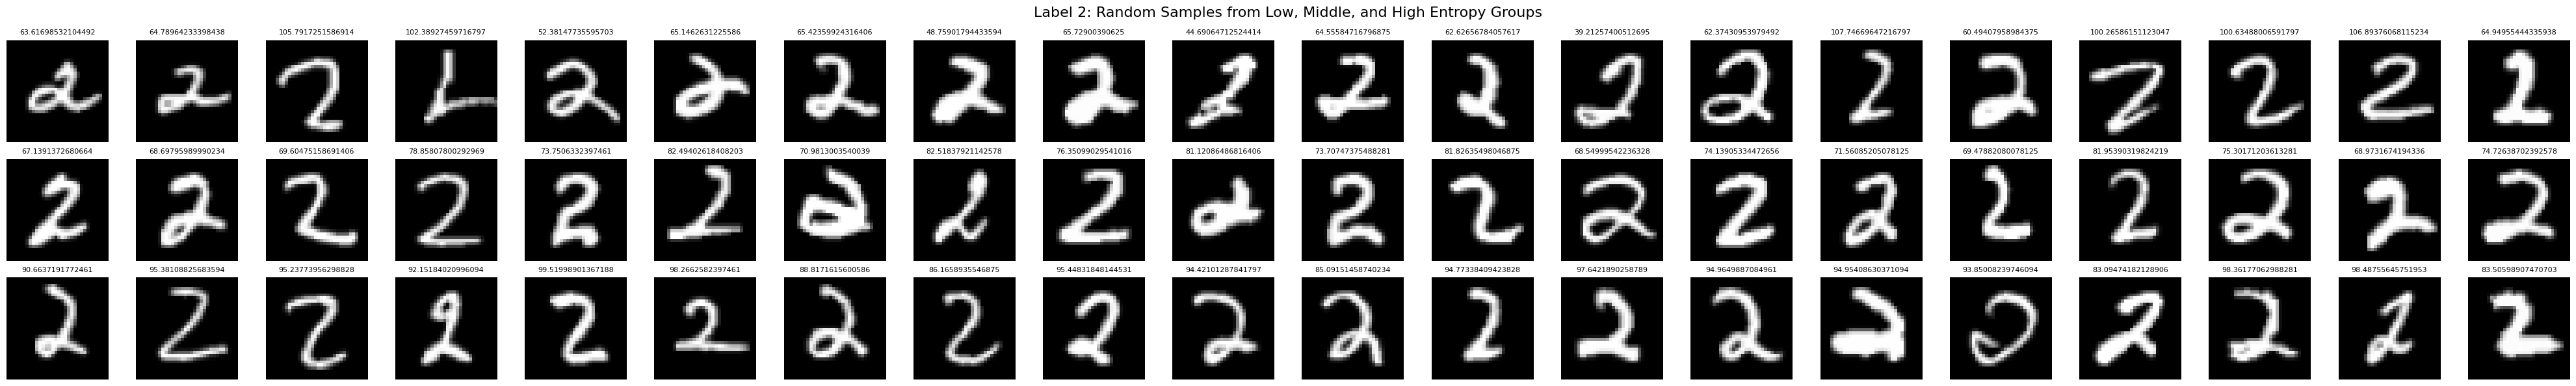

Processing label 3...


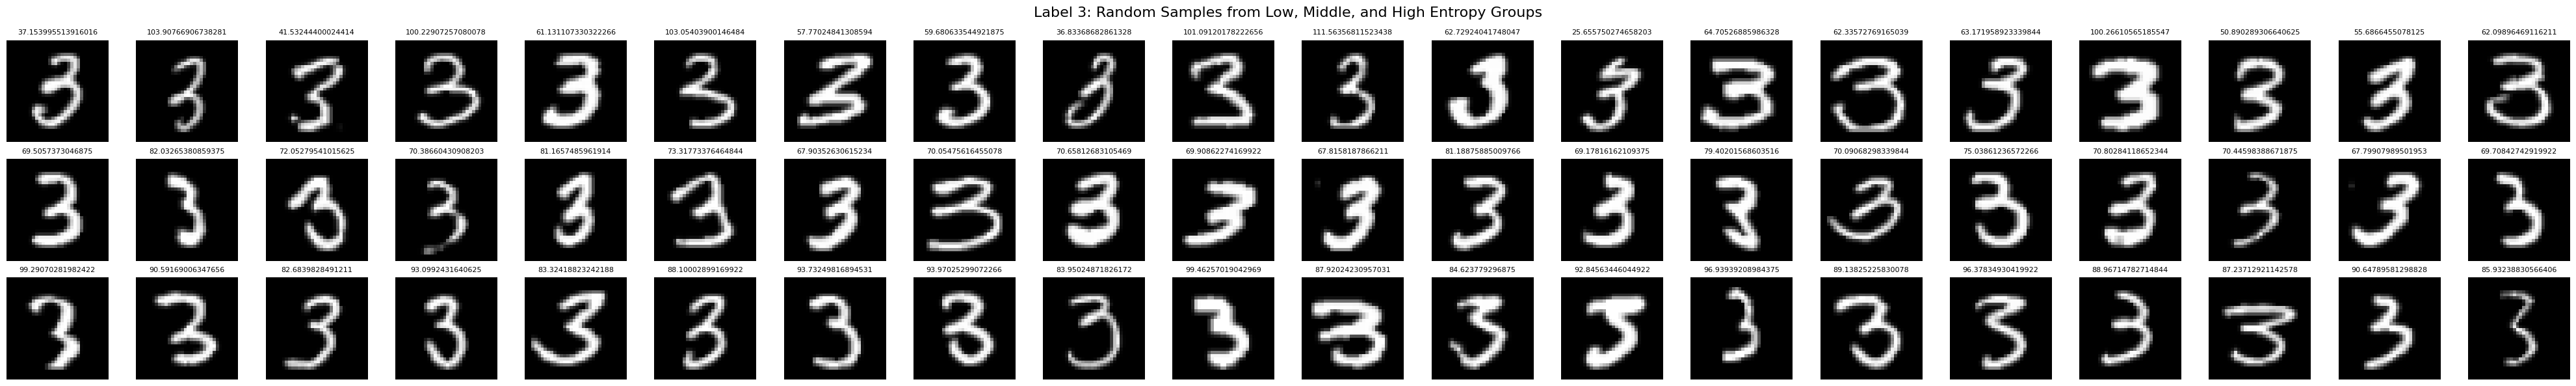

Processing label 4...


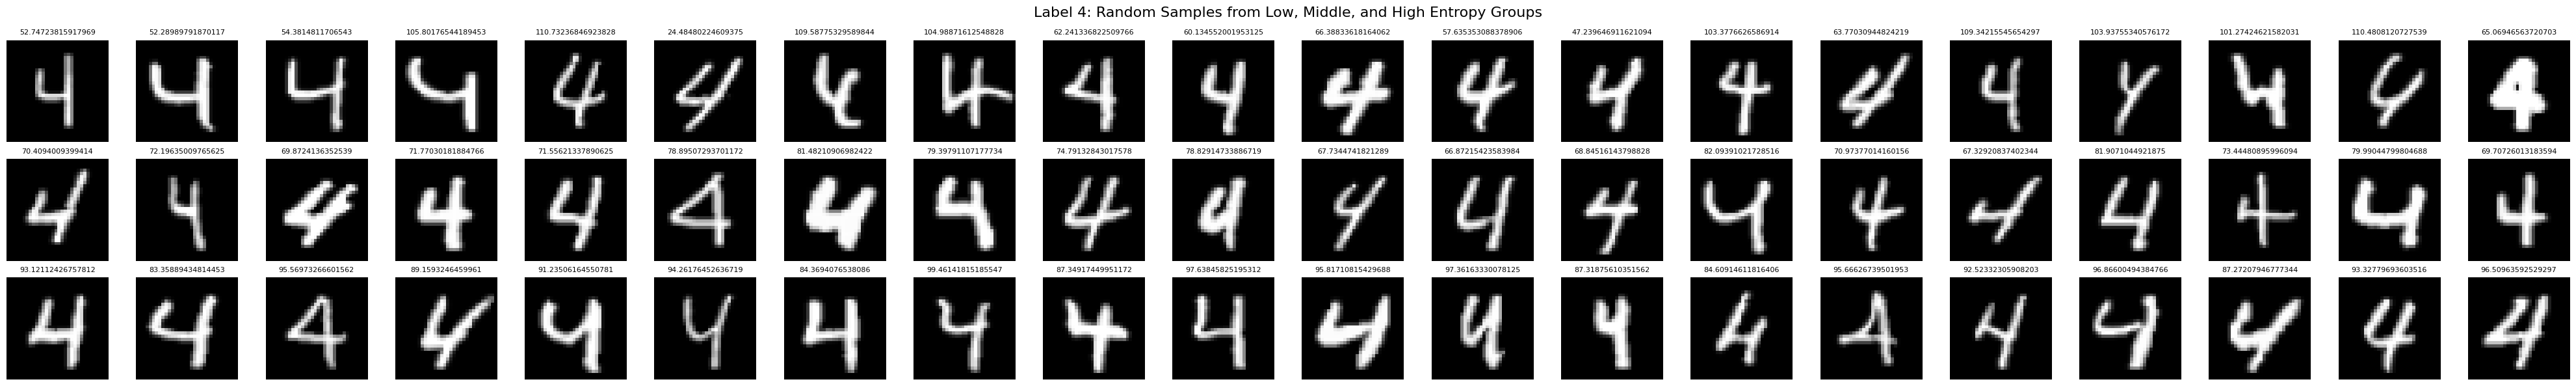

Processing label 5...


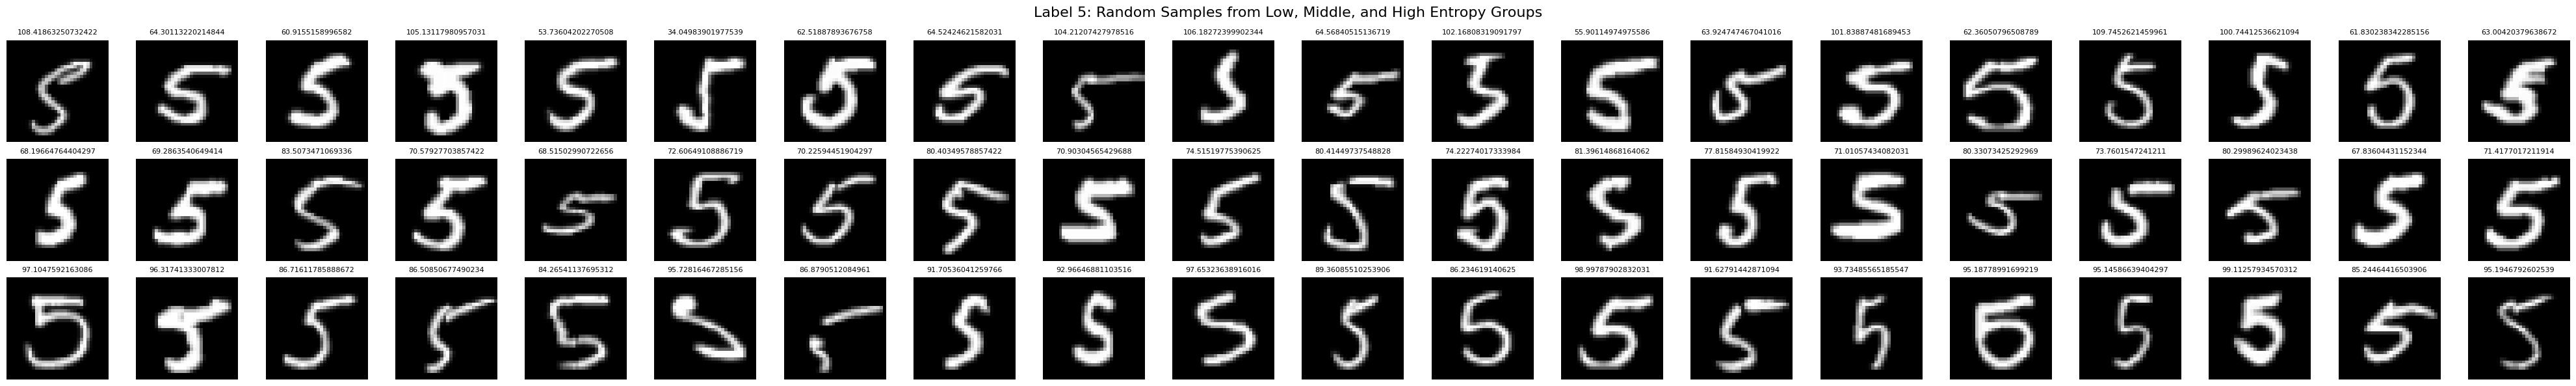

Processing label 6...


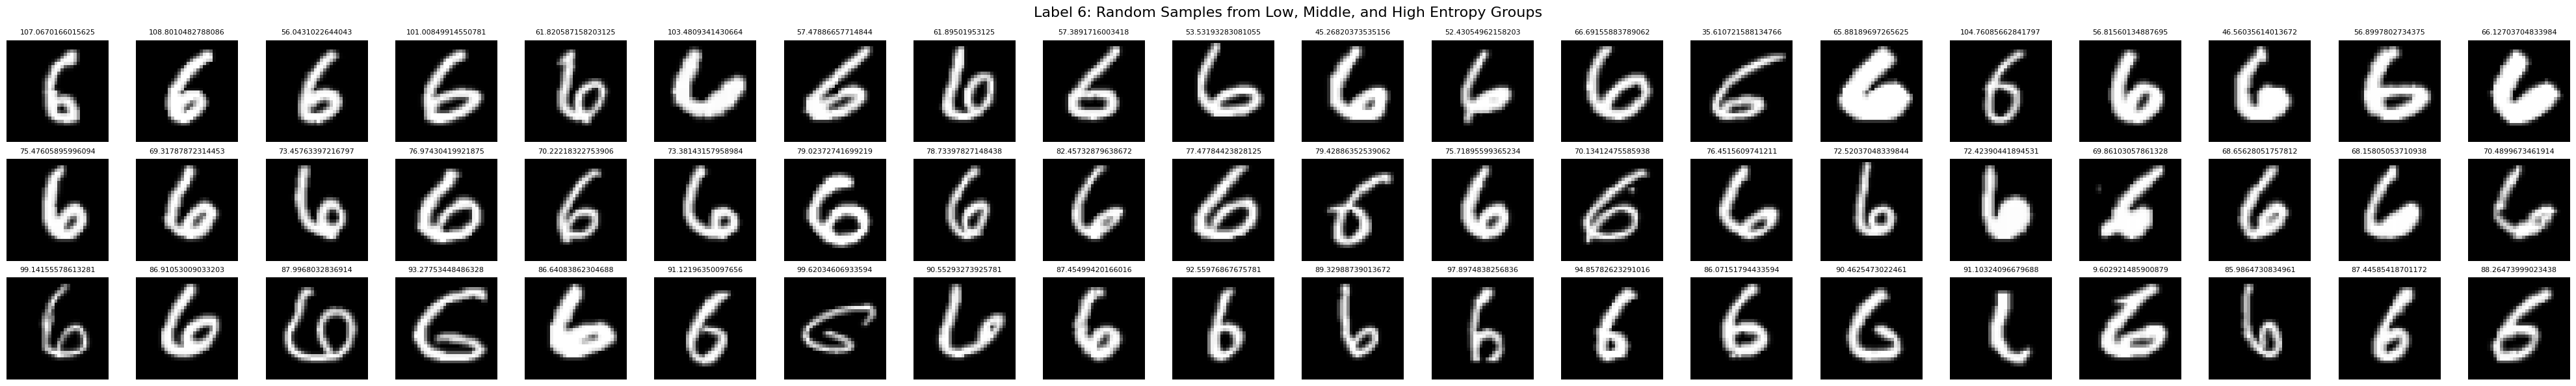

Processing label 7...


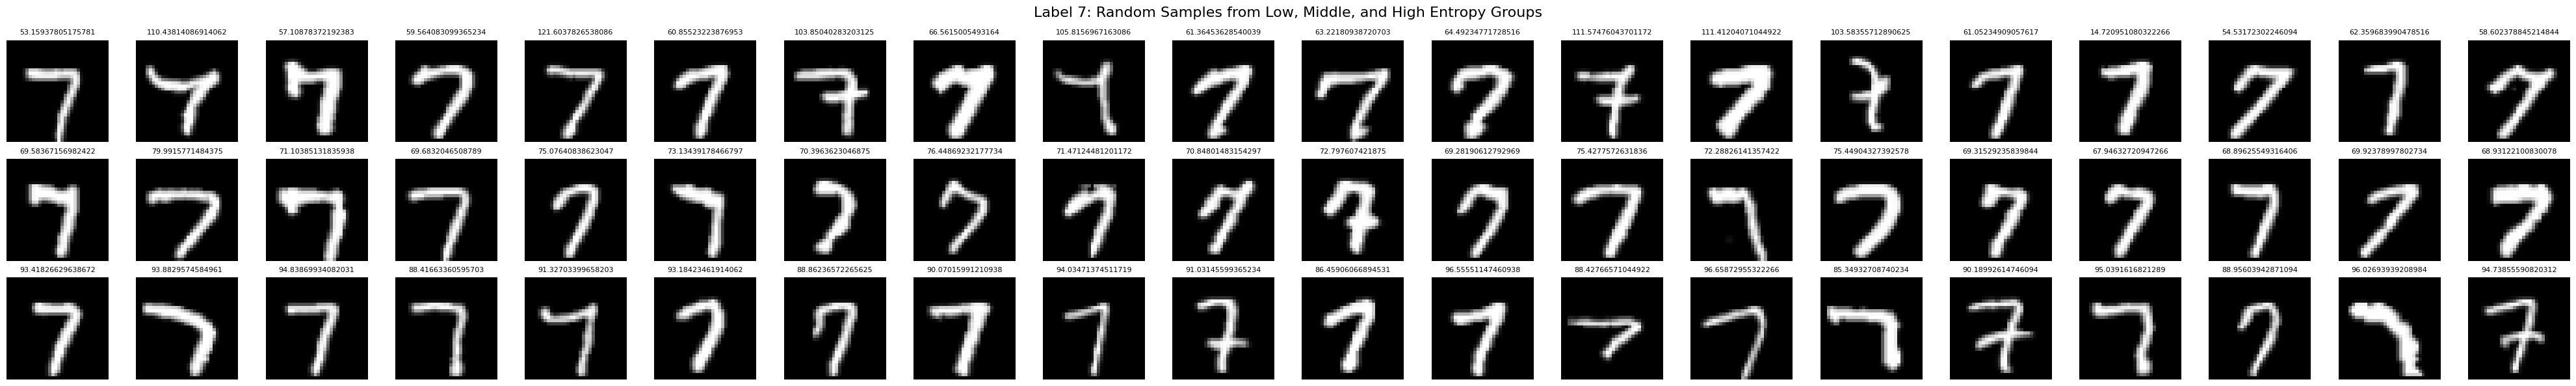

Processing label 8...


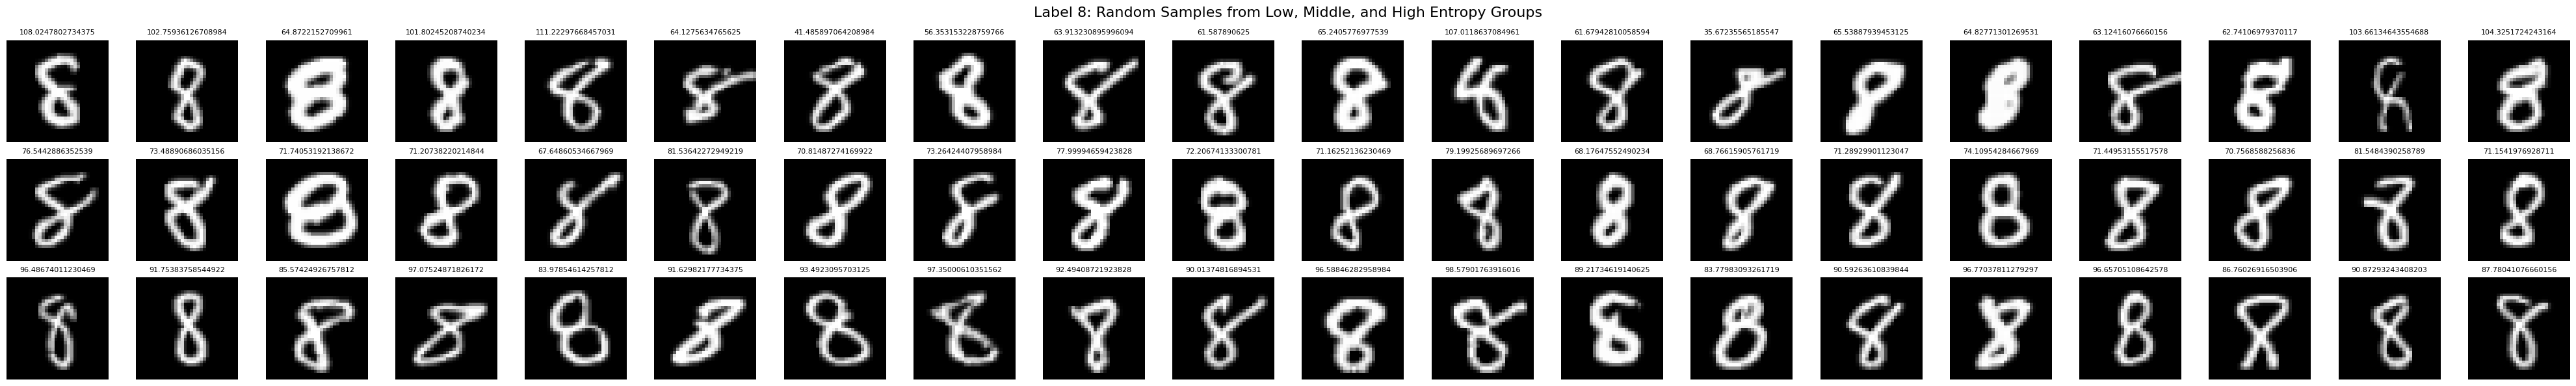

Processing label 9...


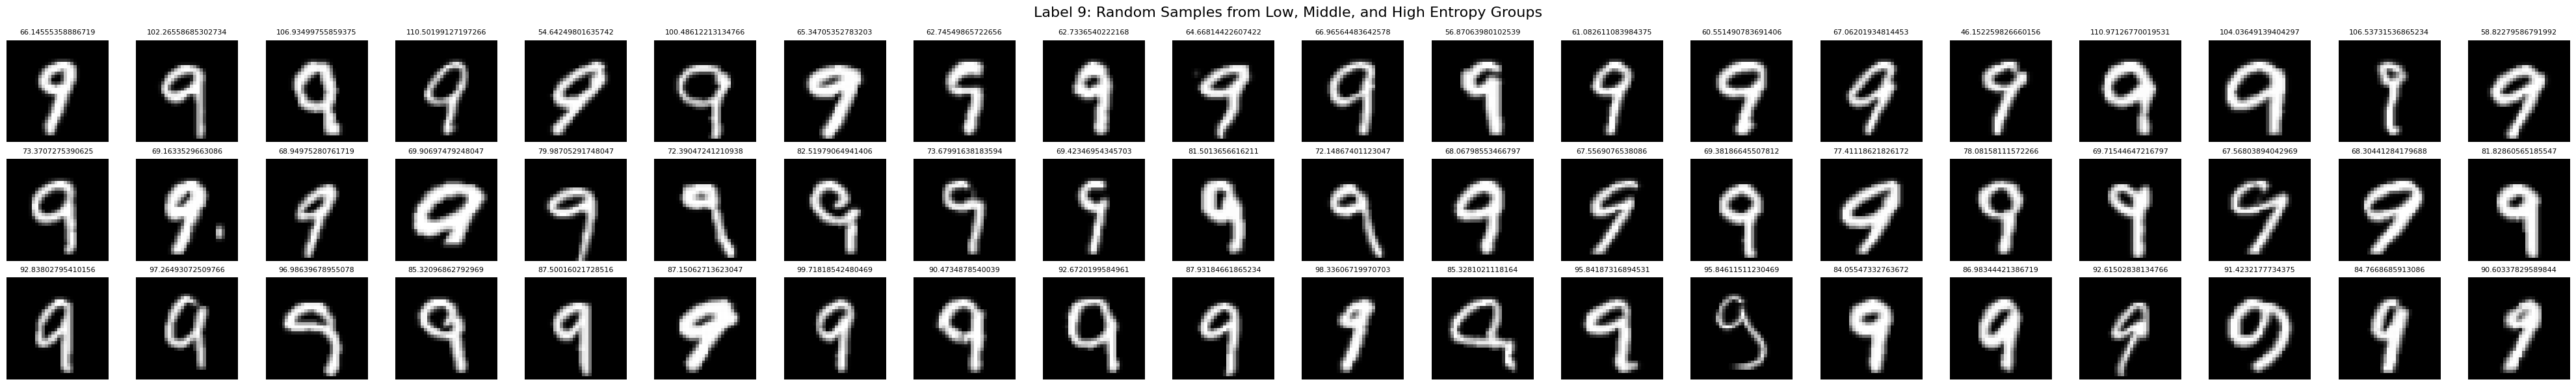

In [4]:
from condensation.sort_evidence import sort_by_total_evidence,sort_by_label_evidence, sort_by_label_uncertainty,sort_by_total_uncertainty


model1 = initiate_model("resnet18", "MNIST", "models/resnet18_MNIST_Evidence")
trainset, testset = initiate_dataset("MNIST", "resnet18")
visualize_entropy_groups_for_labels(testset, model1, sort_by_label_evidence, num_samples=20, rate=1.5)

Modified conv1: updated in_channels to 1.
Modified fc layer: updated out_features to 10.
Loaded weights from file: models/resnet18_MNIST_Evidence
Processing label 0...


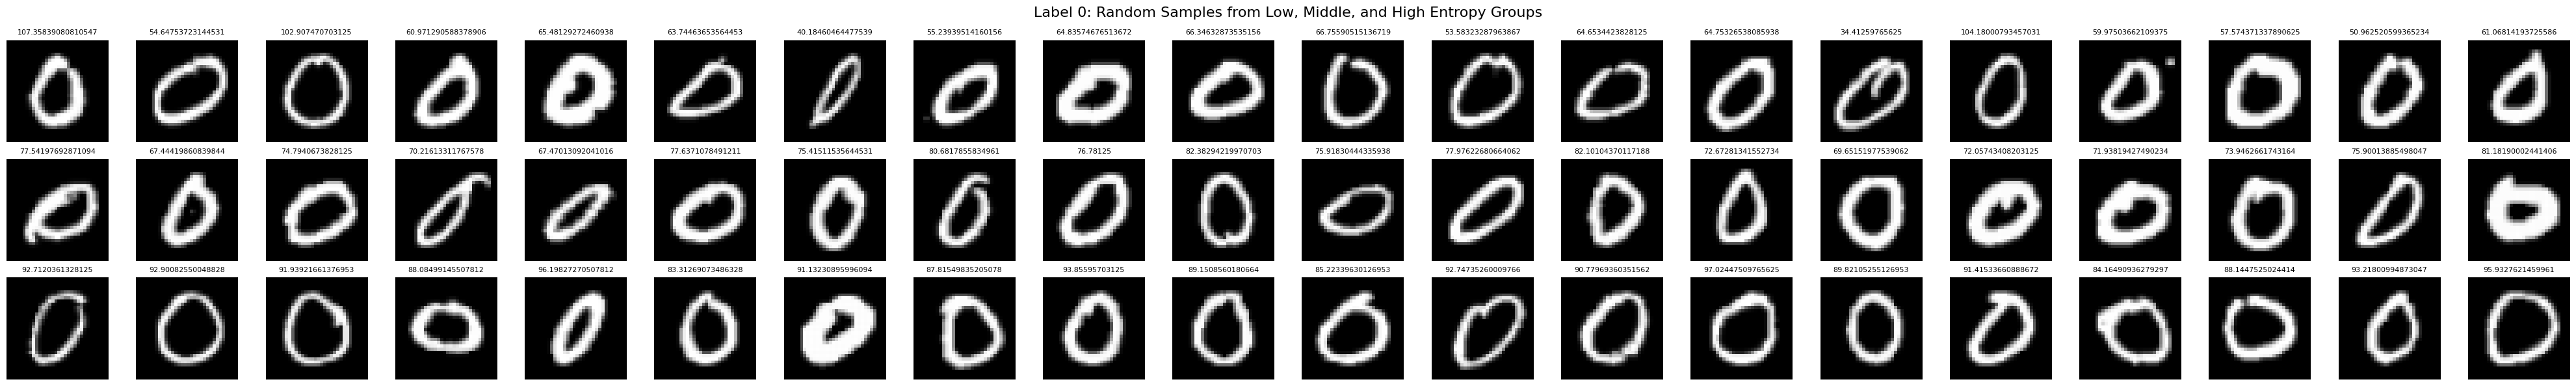

Processing label 1...


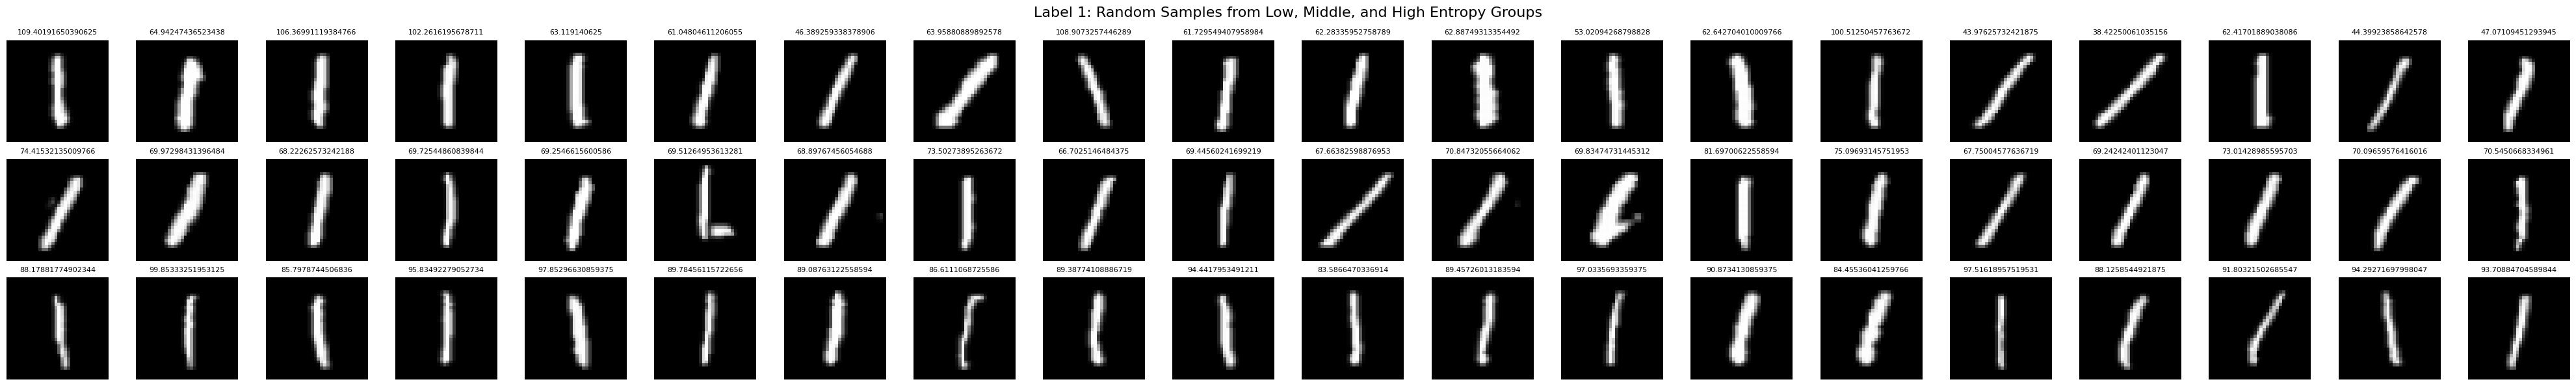

Processing label 2...


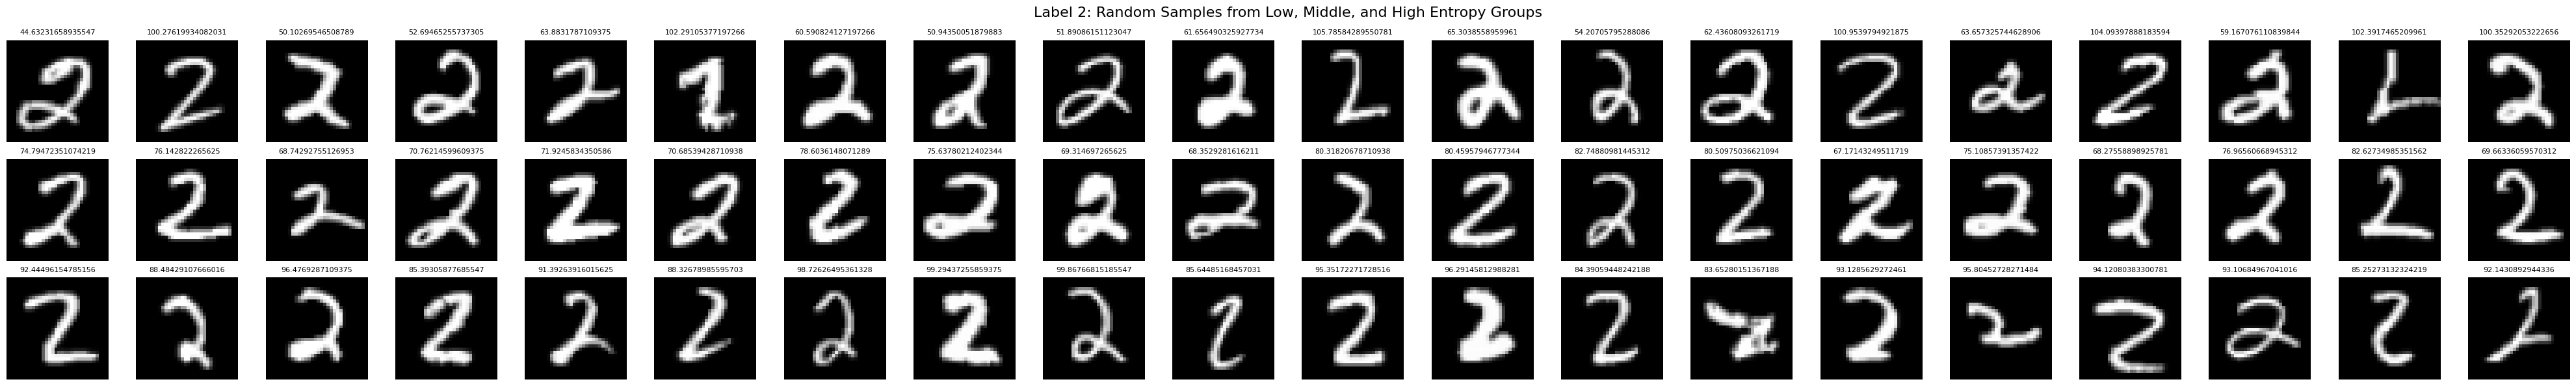

Processing label 3...


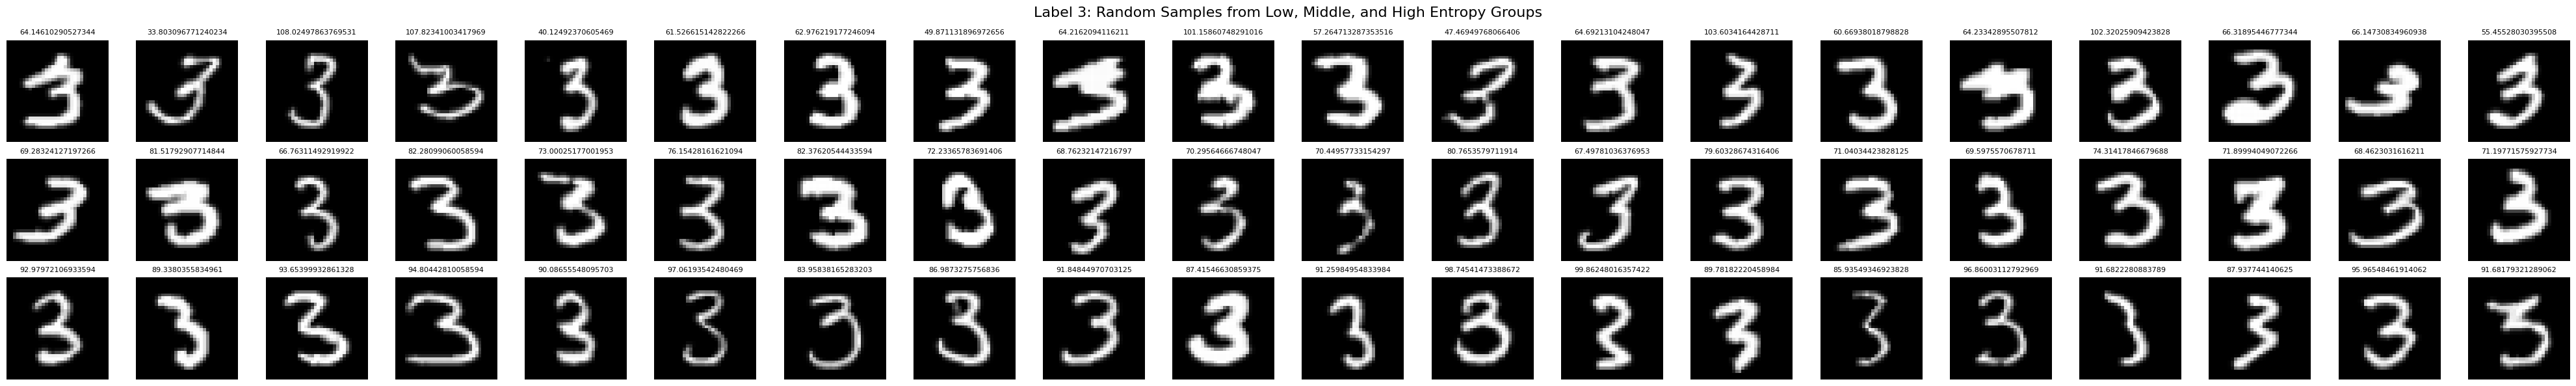

Processing label 4...


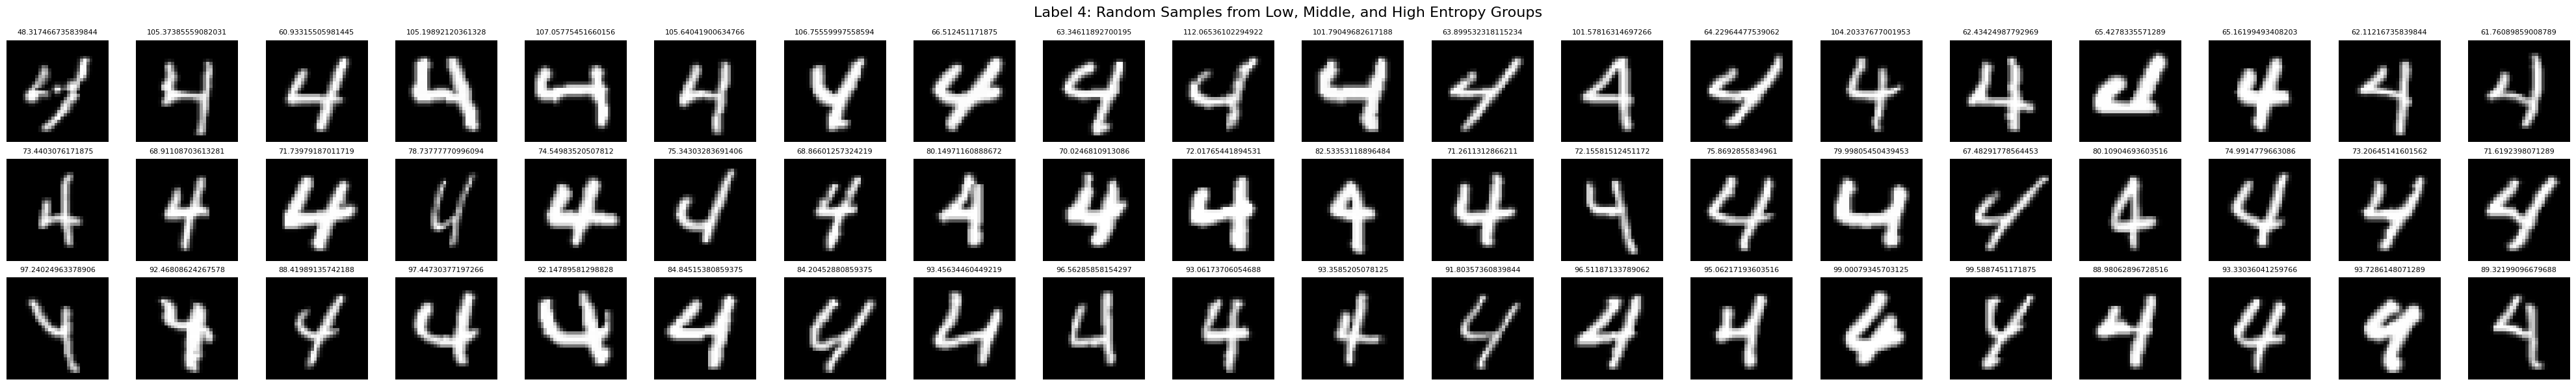

Processing label 5...


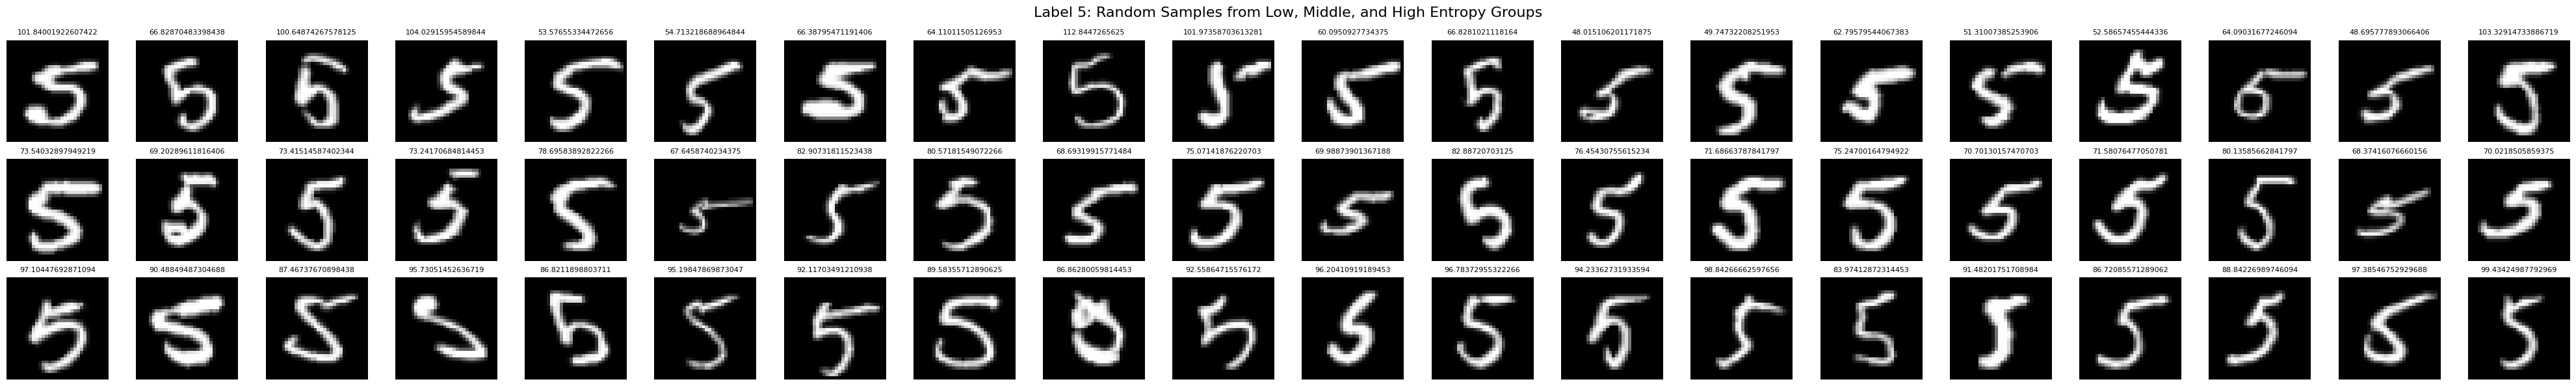

Processing label 6...


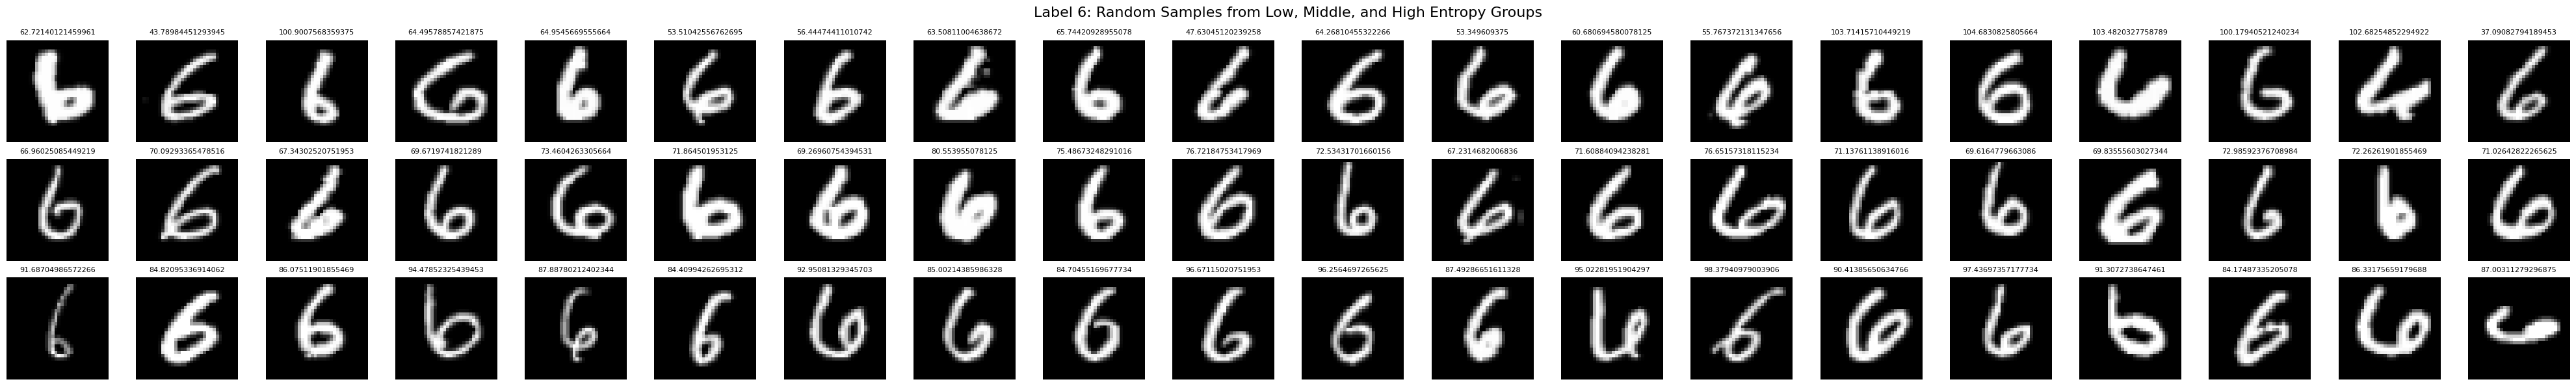

Processing label 7...


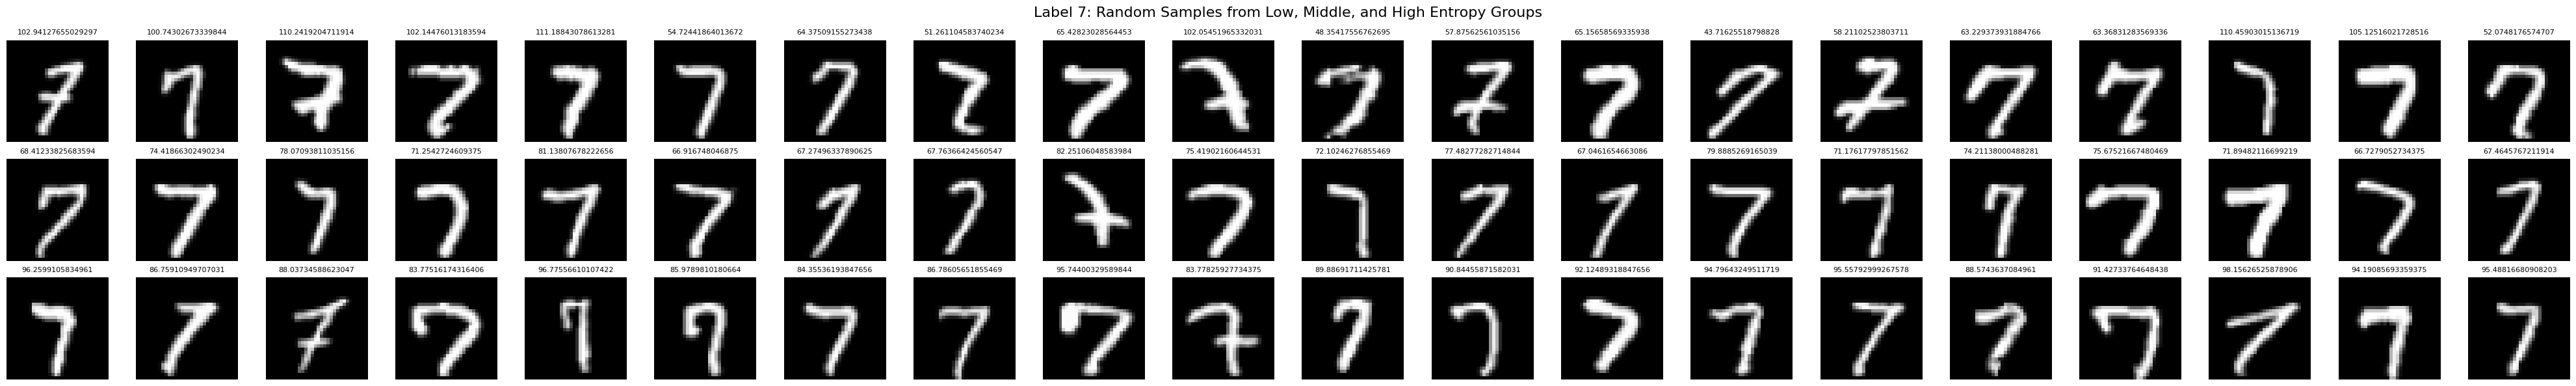

Processing label 8...


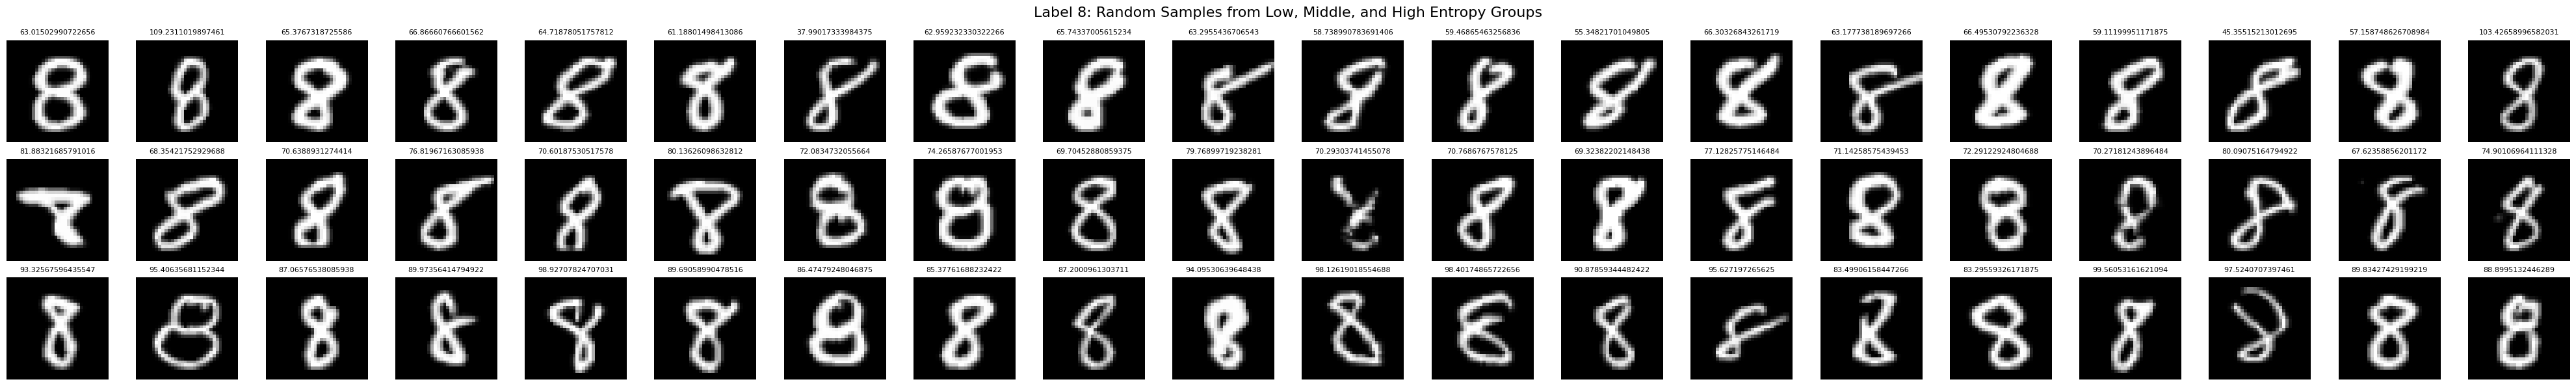

Processing label 9...


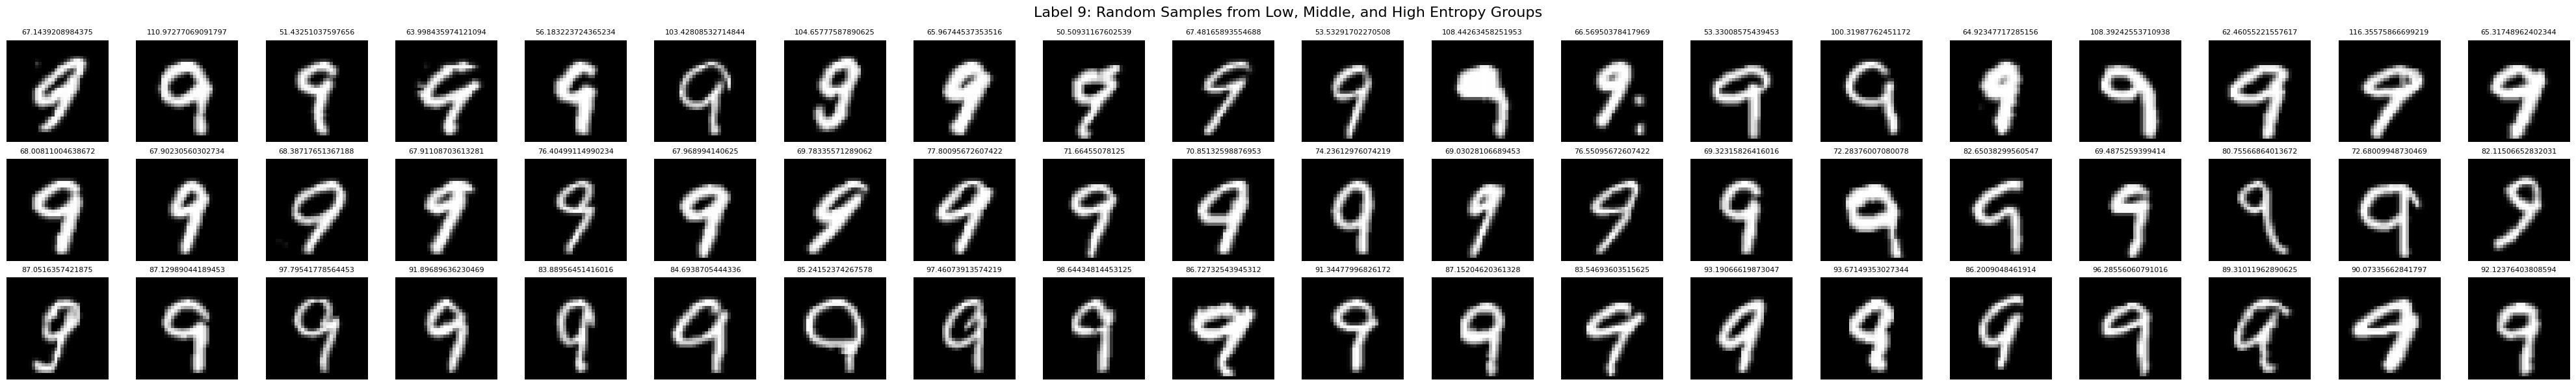

In [5]:
from condensation.sort_evidence import sort_by_total_evidence,sort_by_label_evidence, sort_by_label_uncertainty,sort_by_total_uncertainty


model1 = initiate_model("resnet18", "MNIST", "models/resnet18_MNIST_Evidence")
trainset, testset = initiate_dataset("MNIST", "resnet18")
visualize_entropy_groups_for_labels(testset, model1, sort_by_total_evidence, num_samples=20, rate=1.5)

Modified conv1: updated in_channels to 1.
Modified fc layer: updated out_features to 10.
Loaded weights from file: models/resnet18_MNIST_Evidence
Processing label 0...


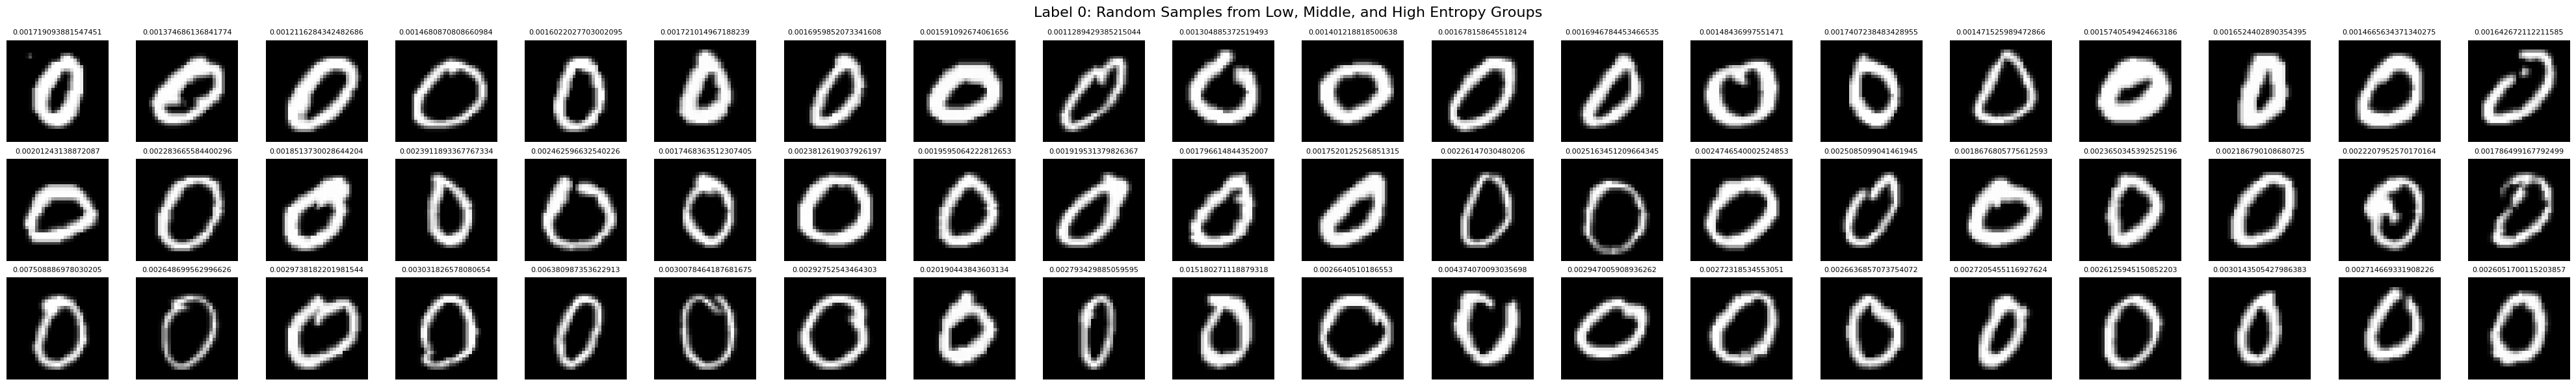

Processing label 1...


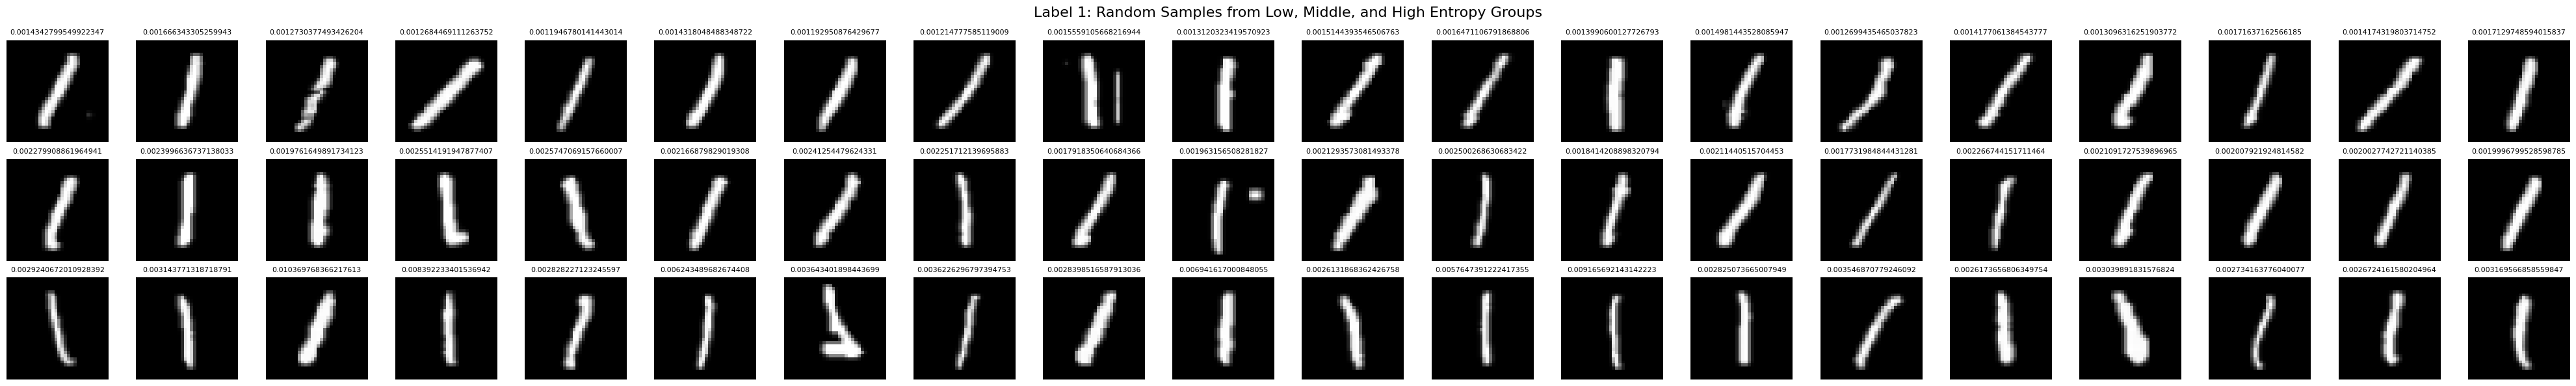

Processing label 2...


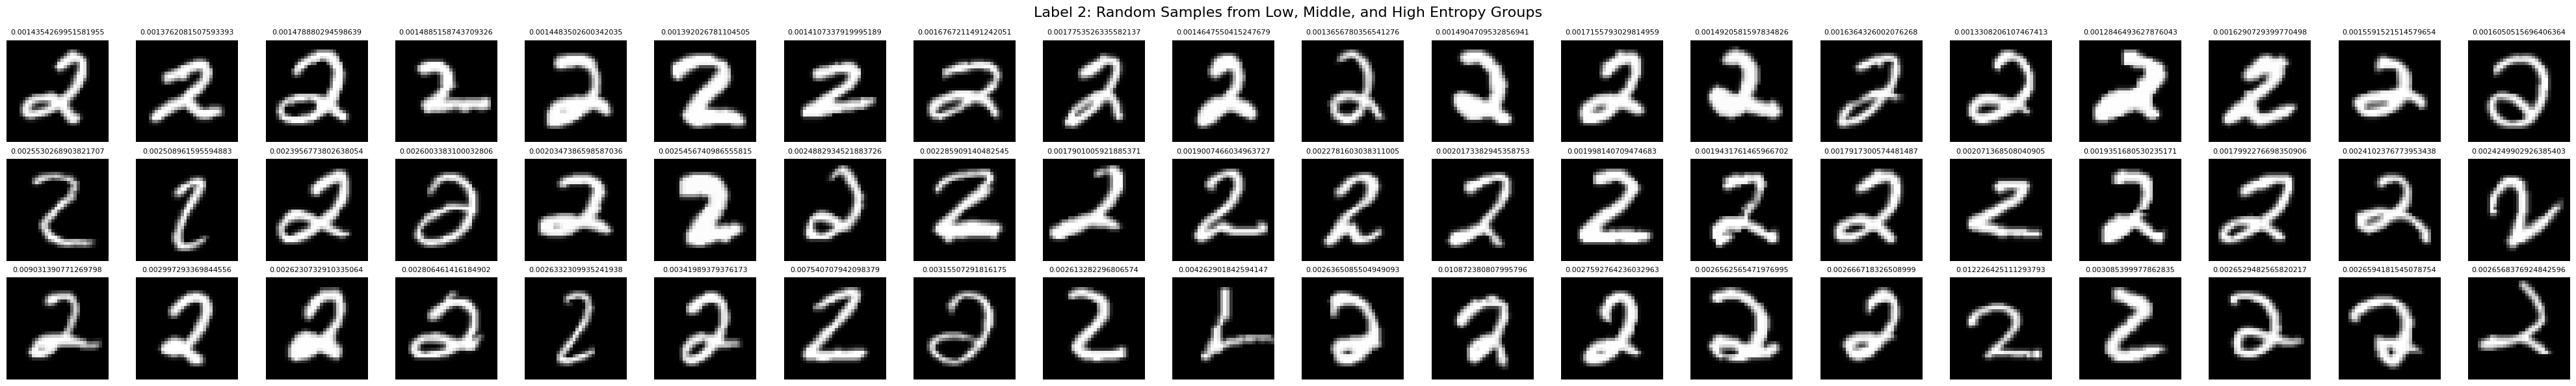

Processing label 3...


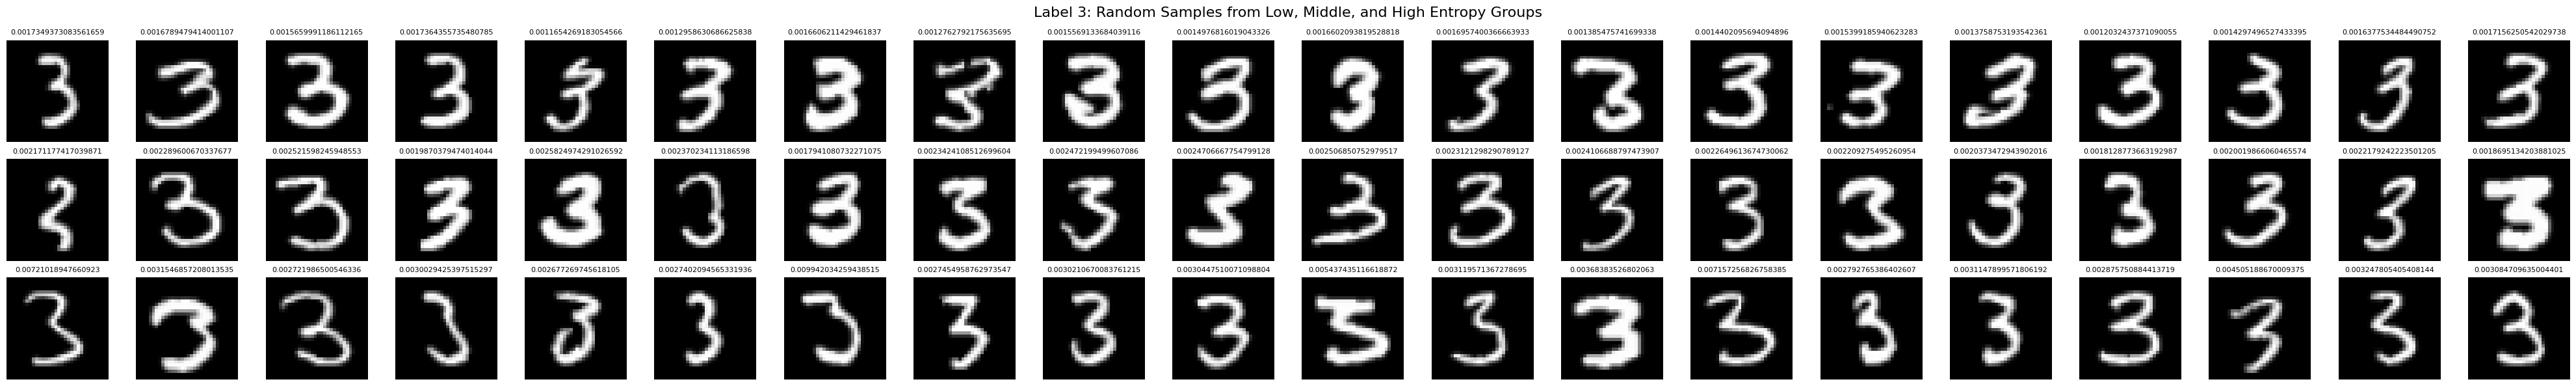

Processing label 4...


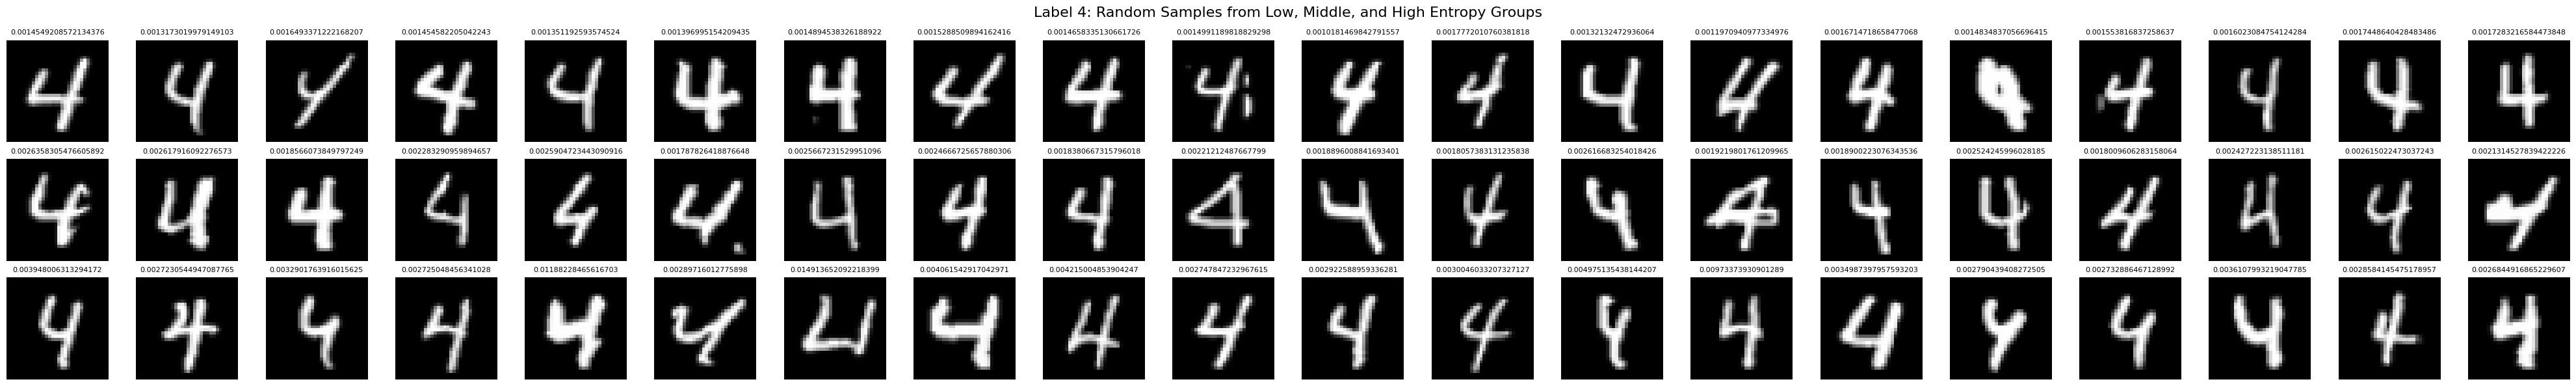

Processing label 5...


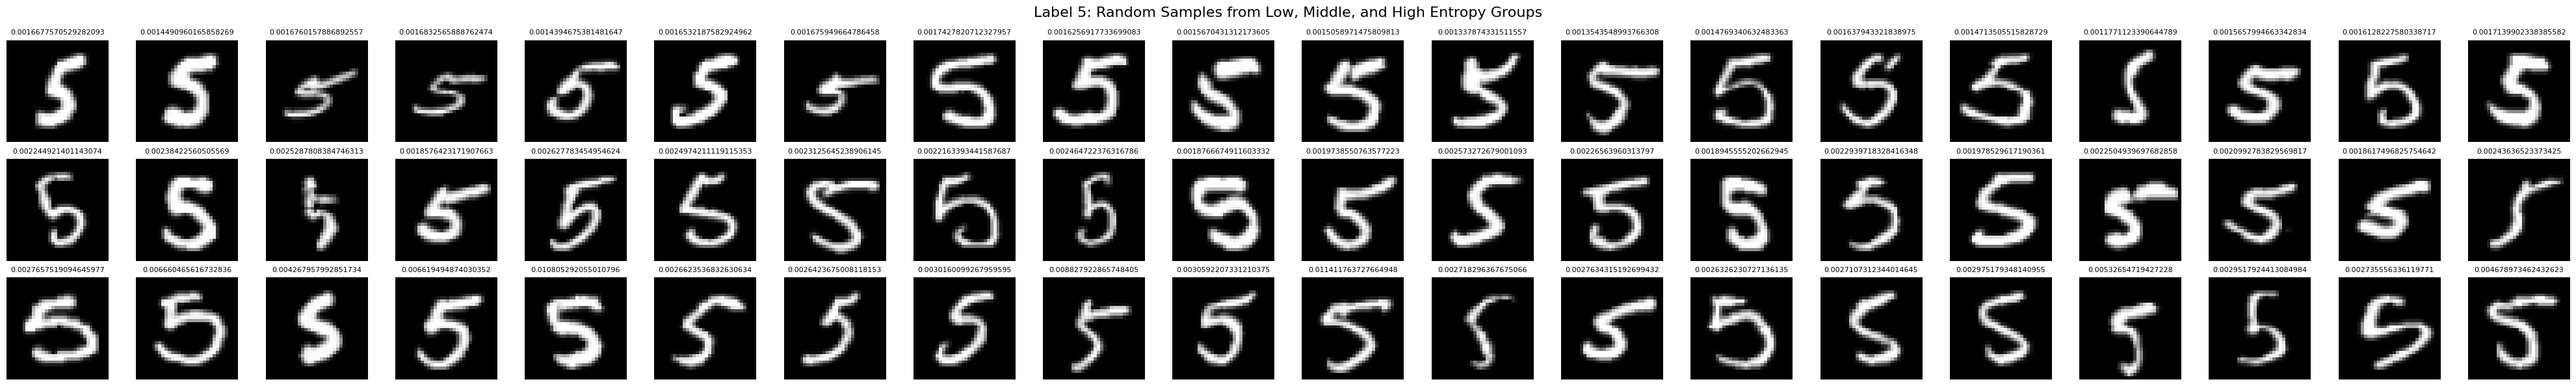

Processing label 6...


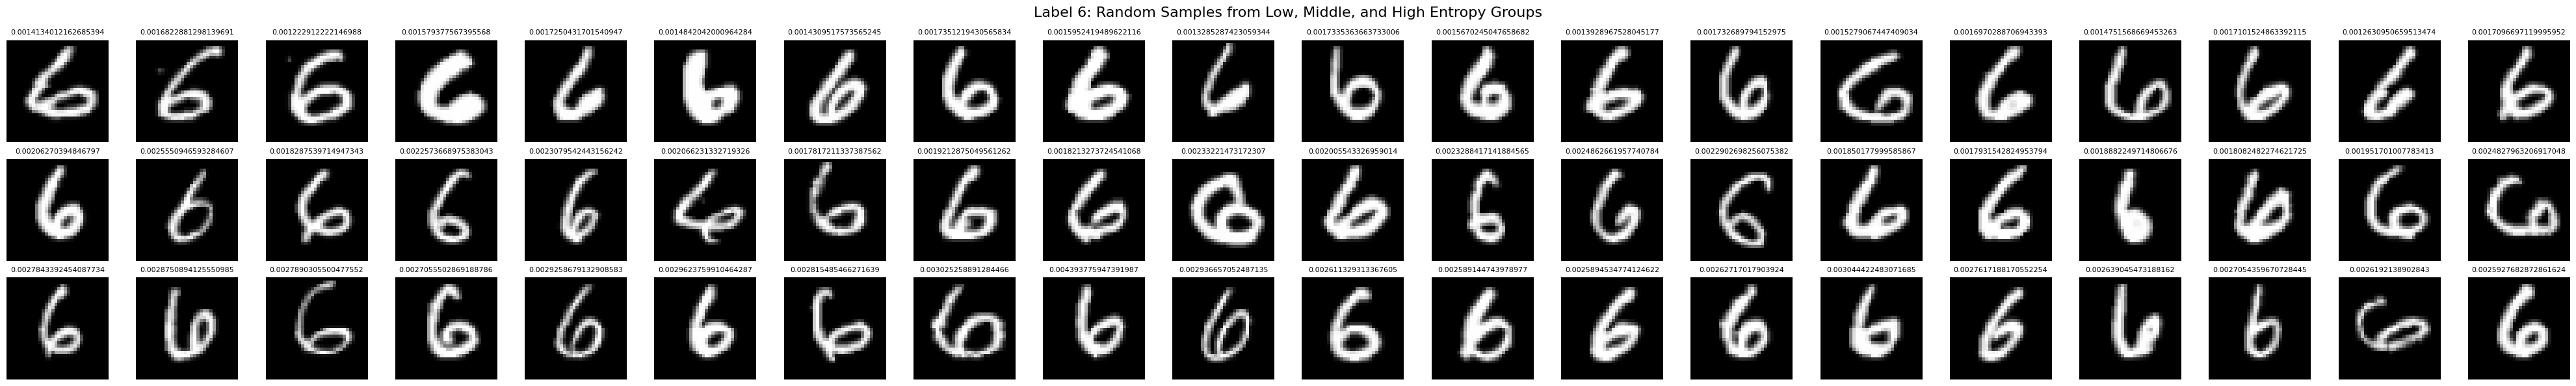

Processing label 7...


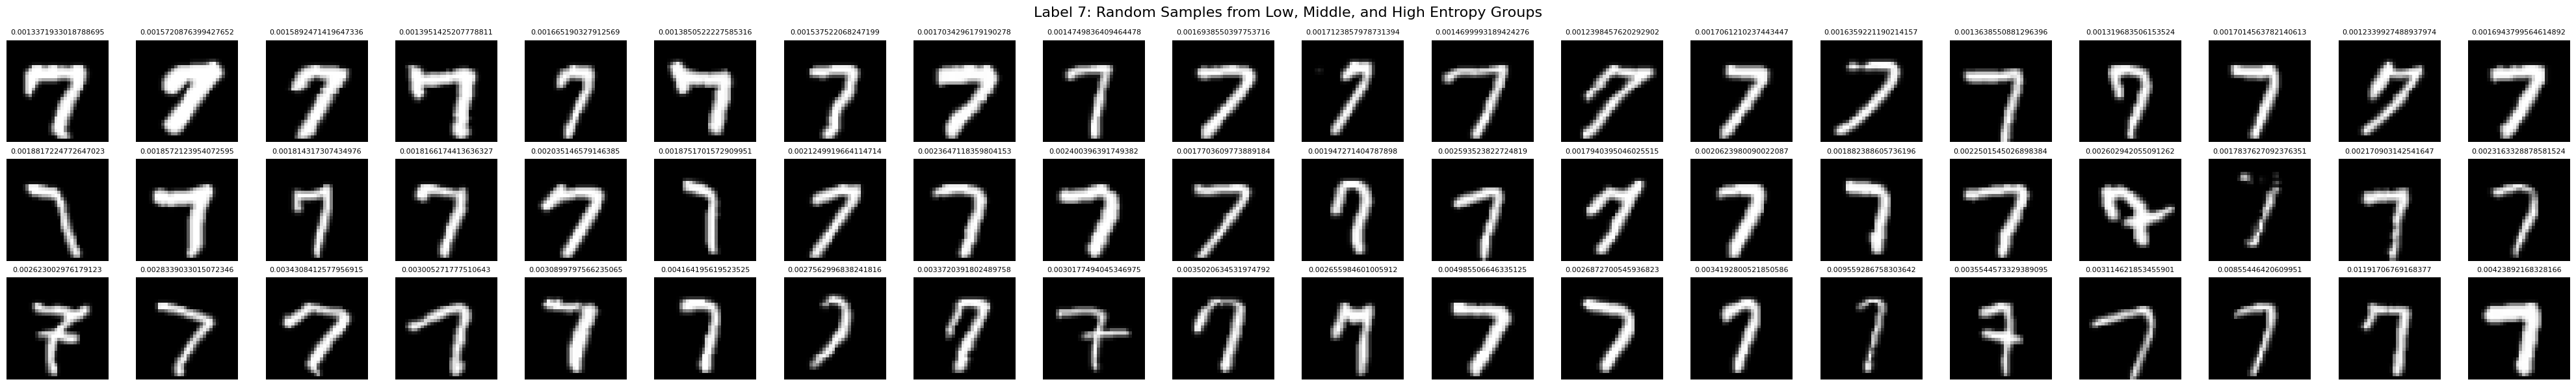

Processing label 8...


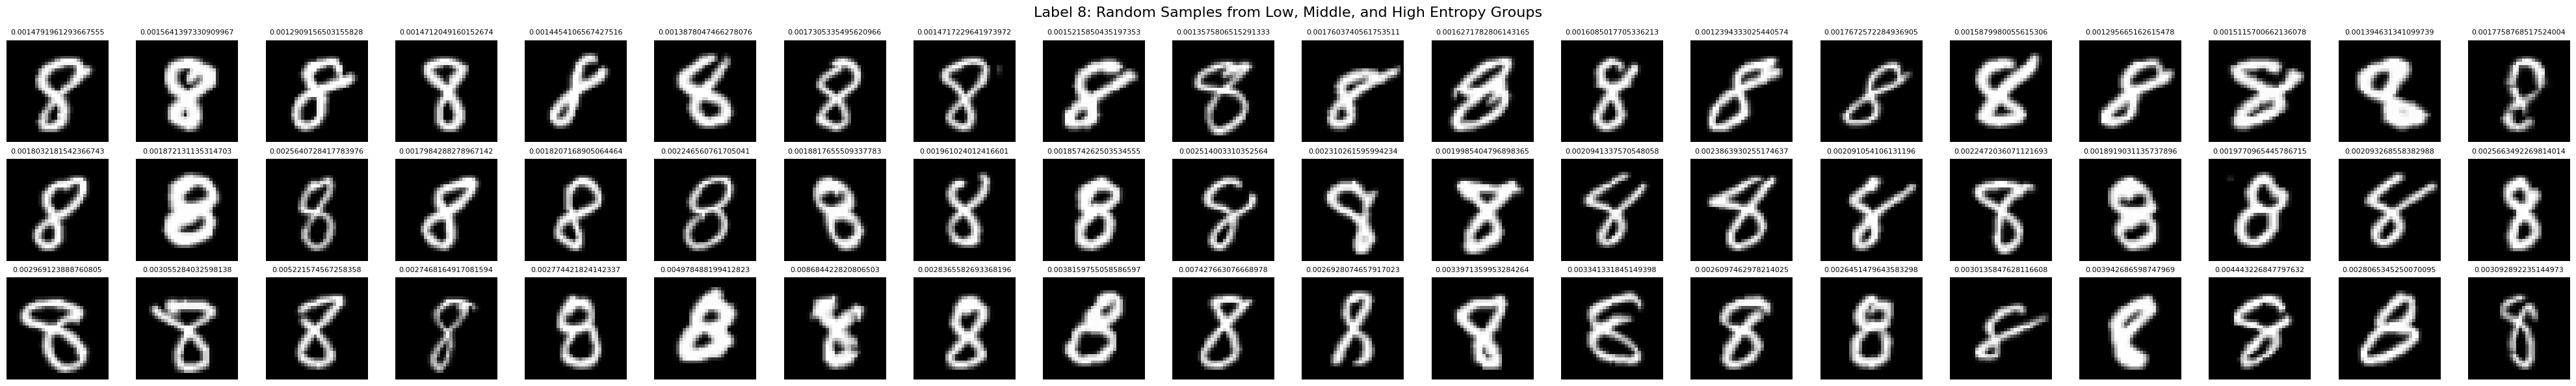

Processing label 9...


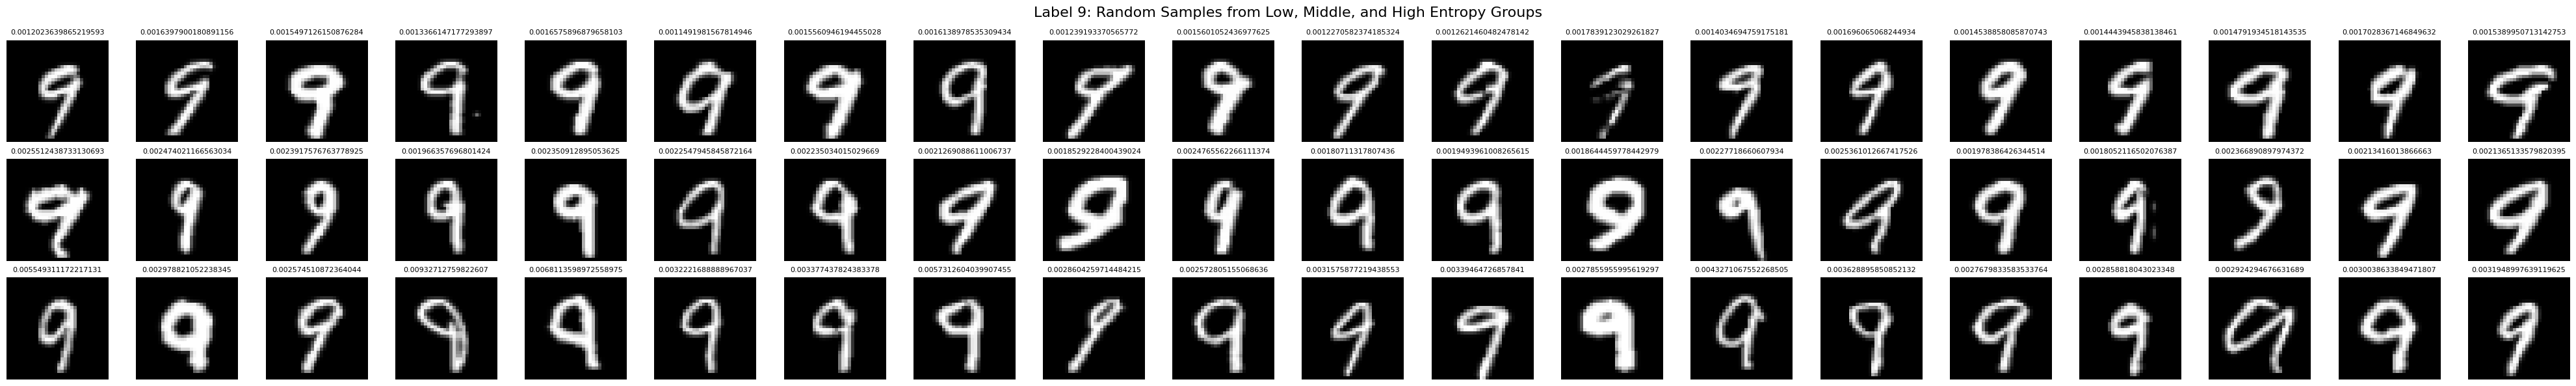

In [6]:
from condensation.sort_evidence import sort_by_total_evidence,sort_by_label_evidence, sort_by_label_uncertainty,sort_by_total_uncertainty


model1 = initiate_model("resnet18", "MNIST", "models/resnet18_MNIST_Evidence")
trainset, testset = initiate_dataset("MNIST", "resnet18")
visualize_entropy_groups_for_labels(testset, model1, sort_by_total_uncertainty
, num_samples=20, rate=1.5)